In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt

import json
import os
import re

from plotting import *

%matplotlib inline

# Question Answering (QA)

## Performance over time (evaluation steps) - comparison across $D_{i \in \{Subj, Subj \cup Squad\}}$

In [2]:
# specify general hyperparameters
metrics = ['batch_loss', 'batch_acc', 'batch_f1', 'val_f1', 'val_acc', 'val_loss']

task='QA'
version = 'train'
task_setting ='single'
iv = 'datasets'

======= Layer: LINEAR ======

======= Sampling: UNIFORMSAMPLING ======

====== Task: QA ======

====== Model: ADVERSARIAL ======

===== Metric: BATCH_LOSS =====



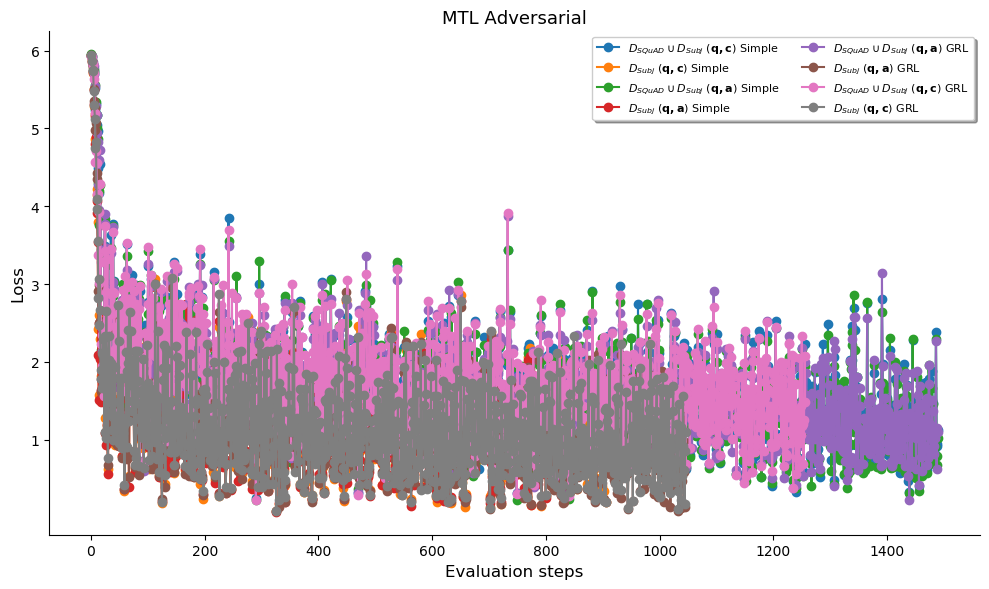

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

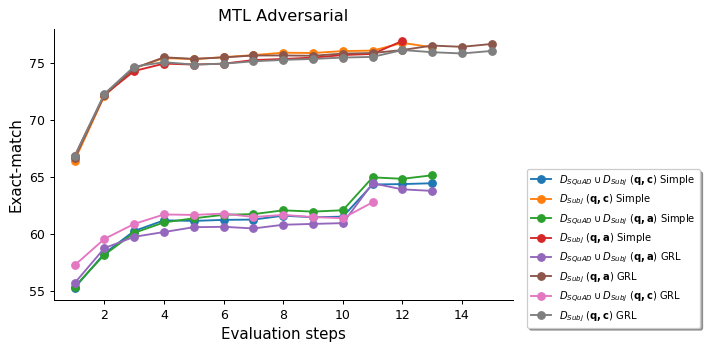

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

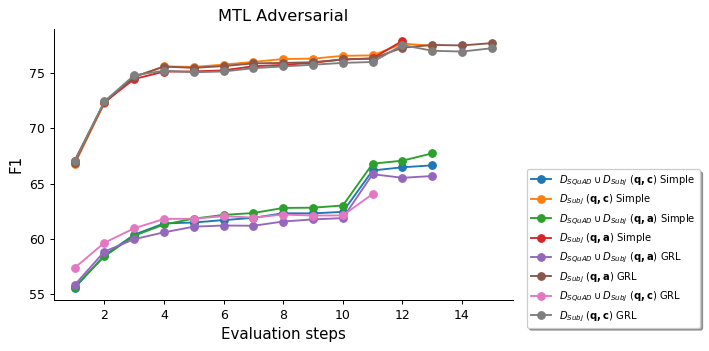

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

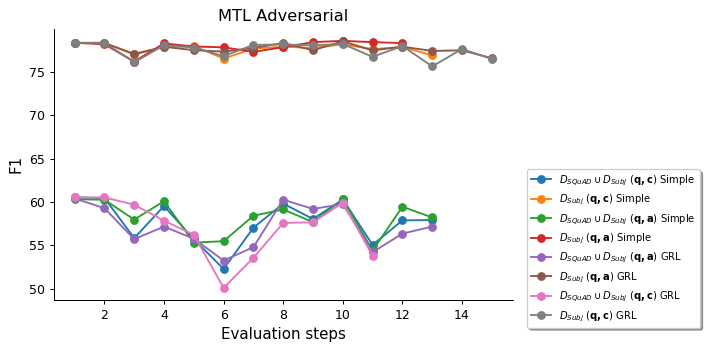

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

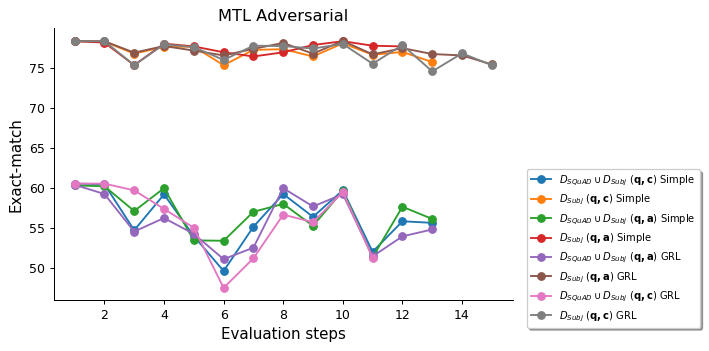

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

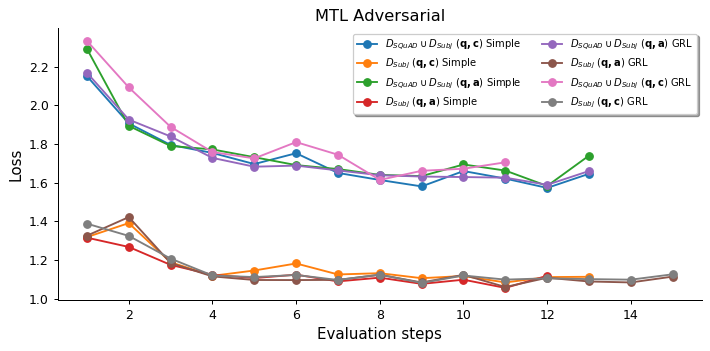

======= Layer: LINEAR ======

======= Sampling: OVERSAMPLING ======

====== Task: QA ======

====== Model: ADVERSARIAL ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

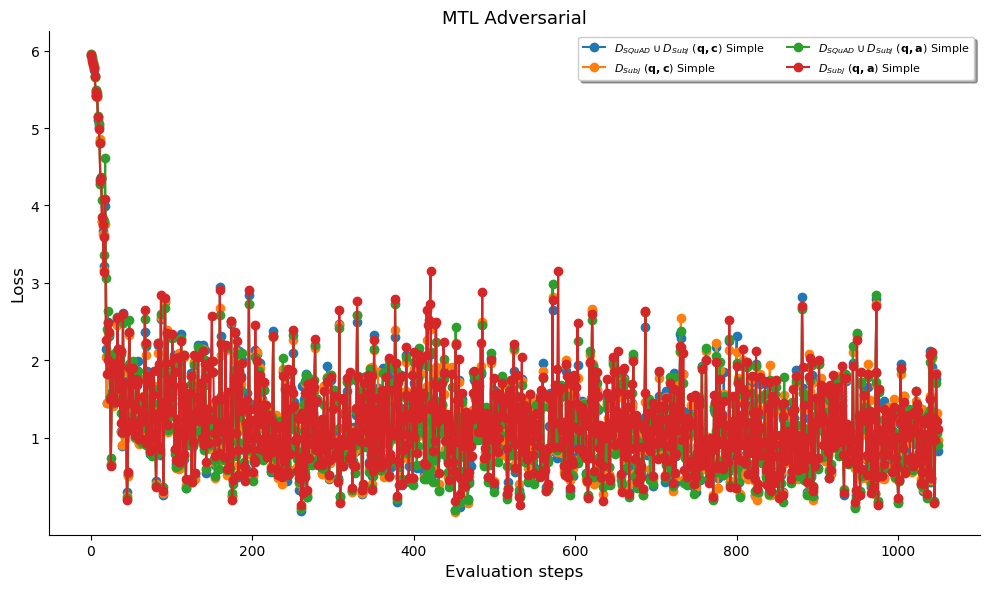

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

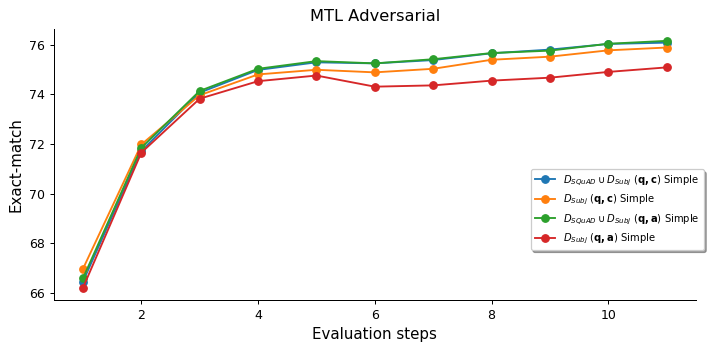

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

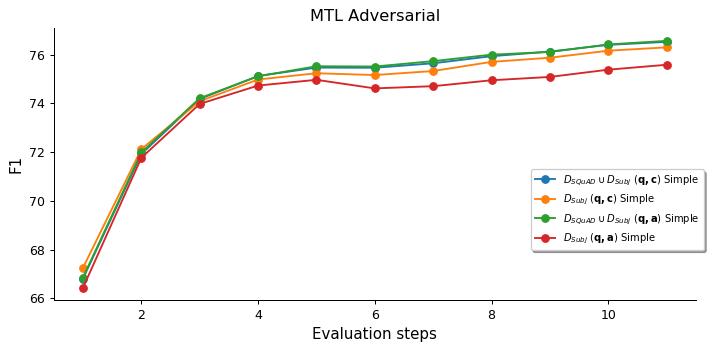

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

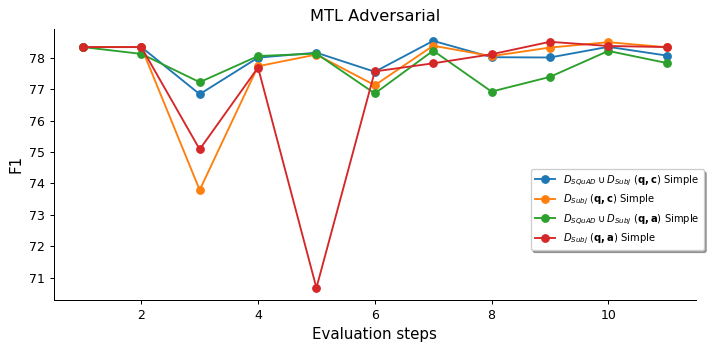

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

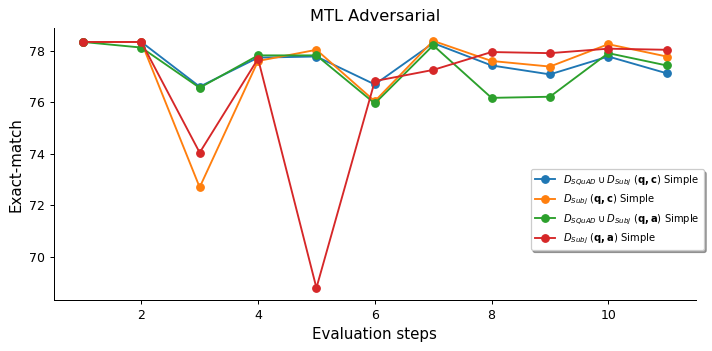

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

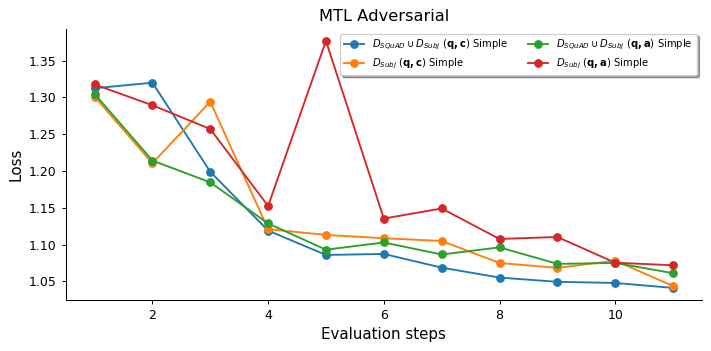

======= Layer: BiLSTM ======

======= Sampling: UNIFORMSAMPLING ======

====== Task: QA ======

====== Model: ADVERSARIAL ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

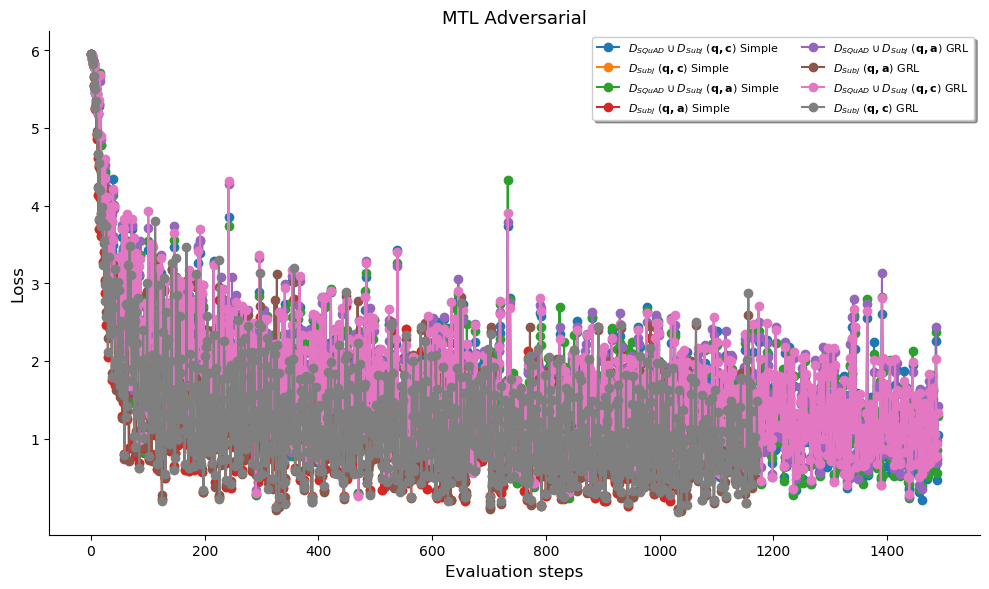

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

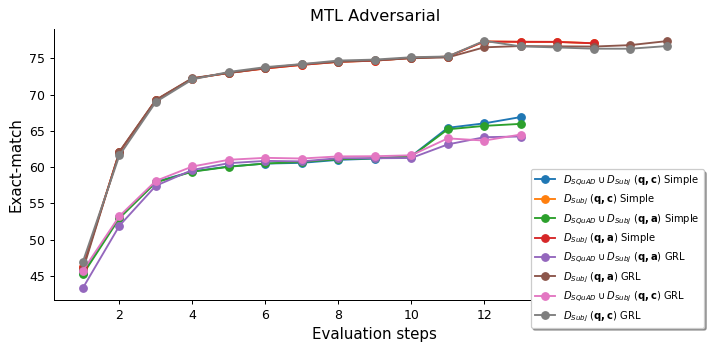

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

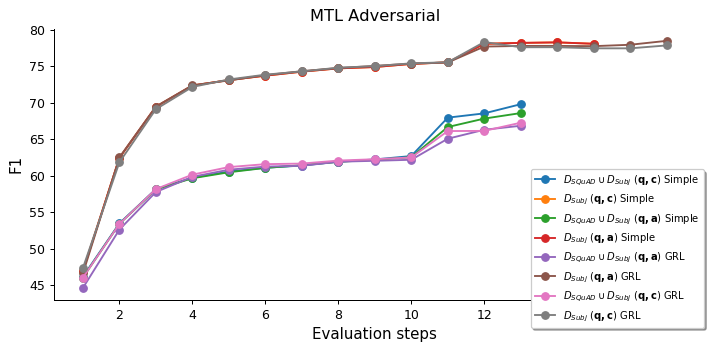

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

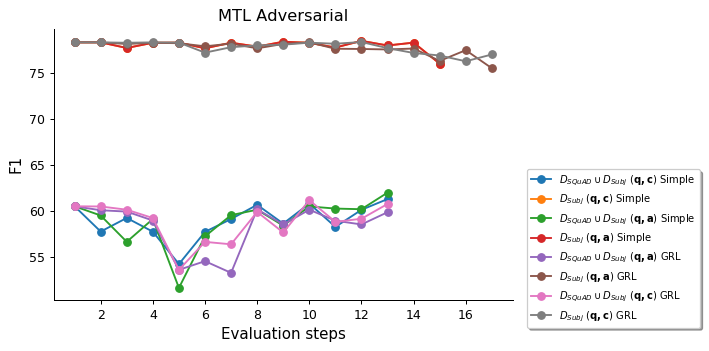

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

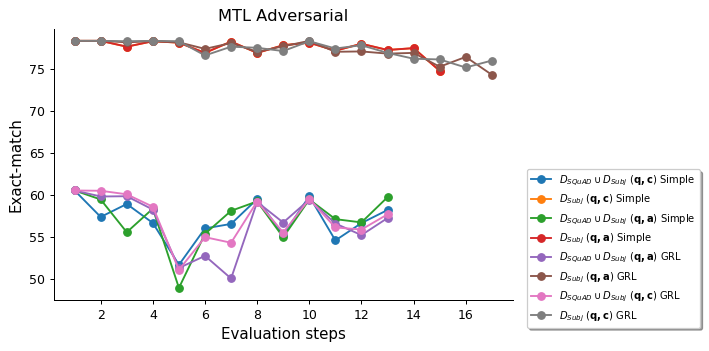

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

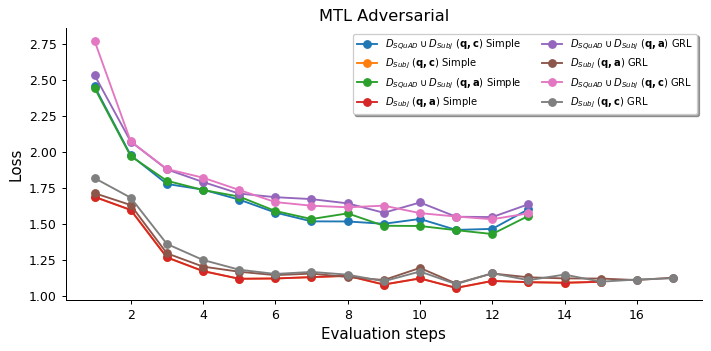

======= Layer: BiLSTM ======

======= Sampling: OVERSAMPLING ======

====== Task: QA ======

====== Model: ADVERSARIAL ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

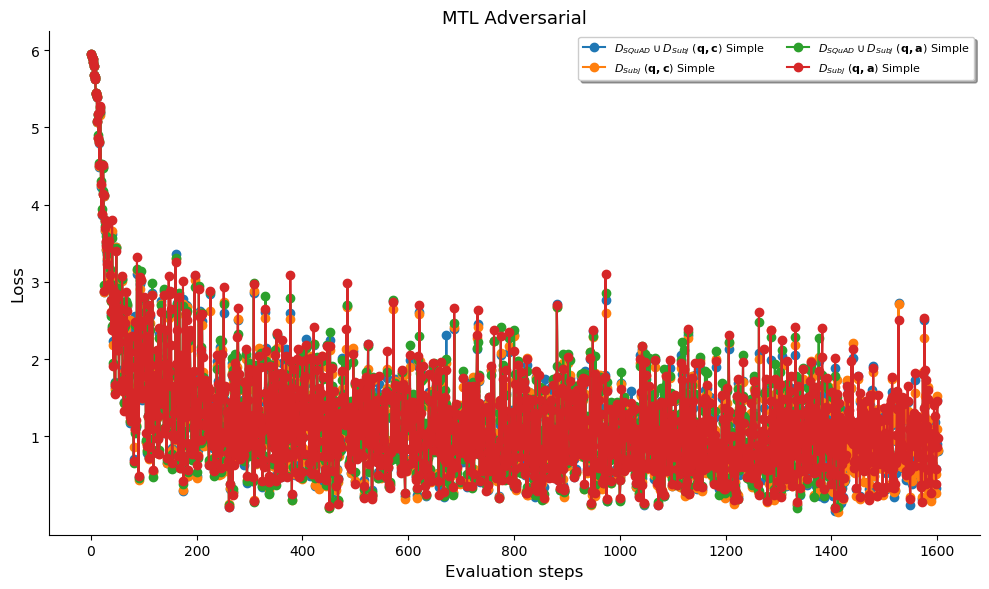

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

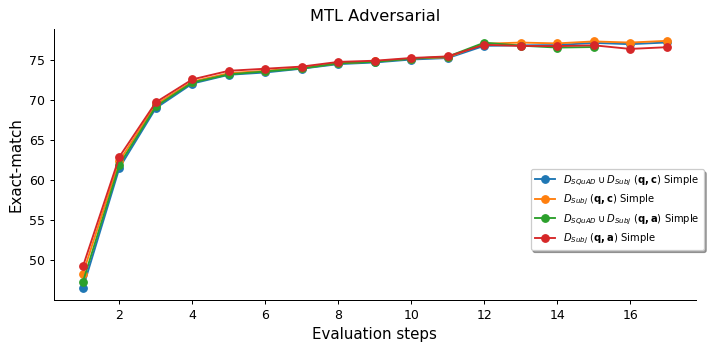

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

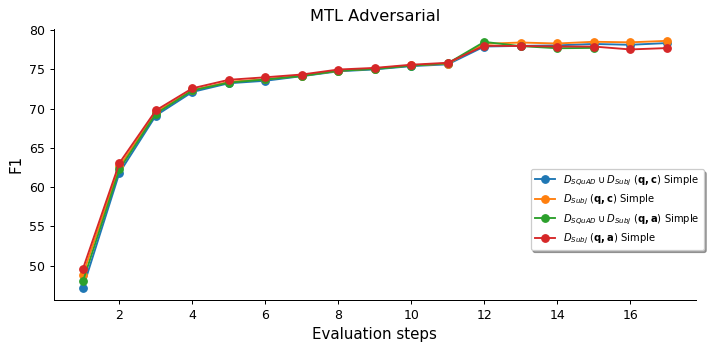

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

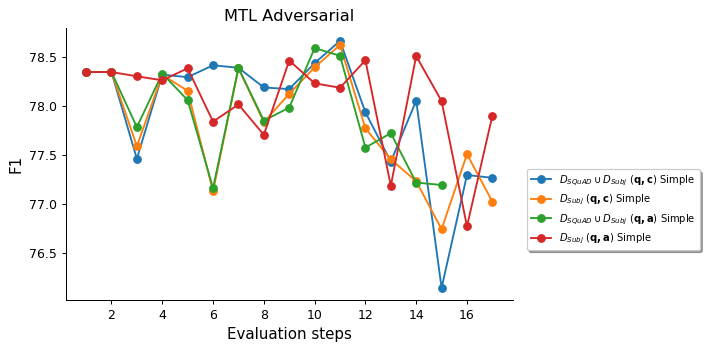

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

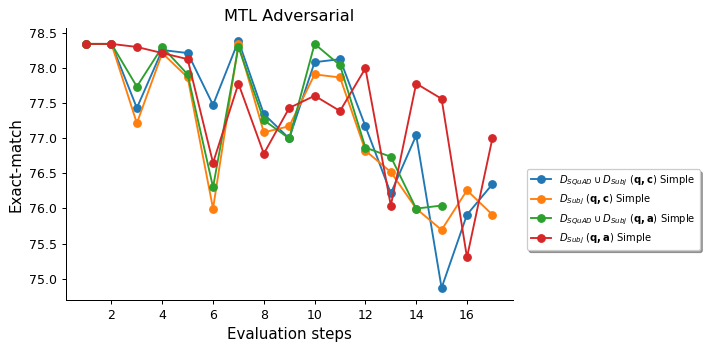

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

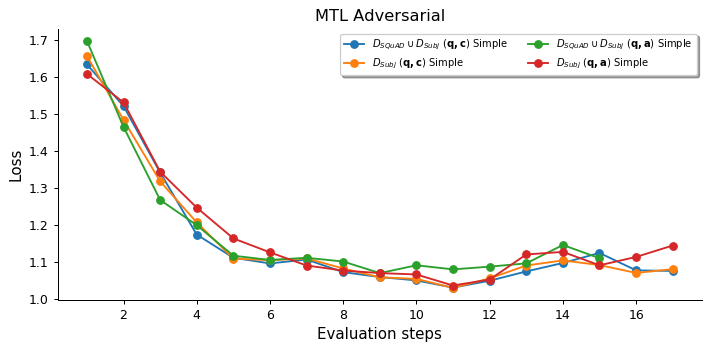

<Figure size 432x288 with 0 Axes>

In [3]:
## Adversarial models
models = ['adversarial']
layers = ['linear', 'recurrent']
sampling_strategies = ['uniformsampling', 'oversampling']
layer = 'linear'
aux = 'aux_1'

# plot results
for layer in layers:
    for task_sampling in sampling_strategies:
        print('==========================')
        print('======= Layer: {} ======'.format('BiLSTM' if layer == 'recurrent' else layer.upper()))
        print('==========================')
        print()
        print('==================================')
        print('======= Sampling: {} ======'.format(task_sampling.upper()))
        print('==================================')
        print()
        plotting(
                 models=models,
                 metrics=metrics,
                 task=task,
                 version=version,
                 task_setting=task_setting,
                 iv=iv,
                 layer=layer,
                 aux=aux,
                 task_sampling=task_sampling,
        )

====== Task: QA ======

====== Model: LINEAR ======

===== Metric: BATCH_LOSS =====



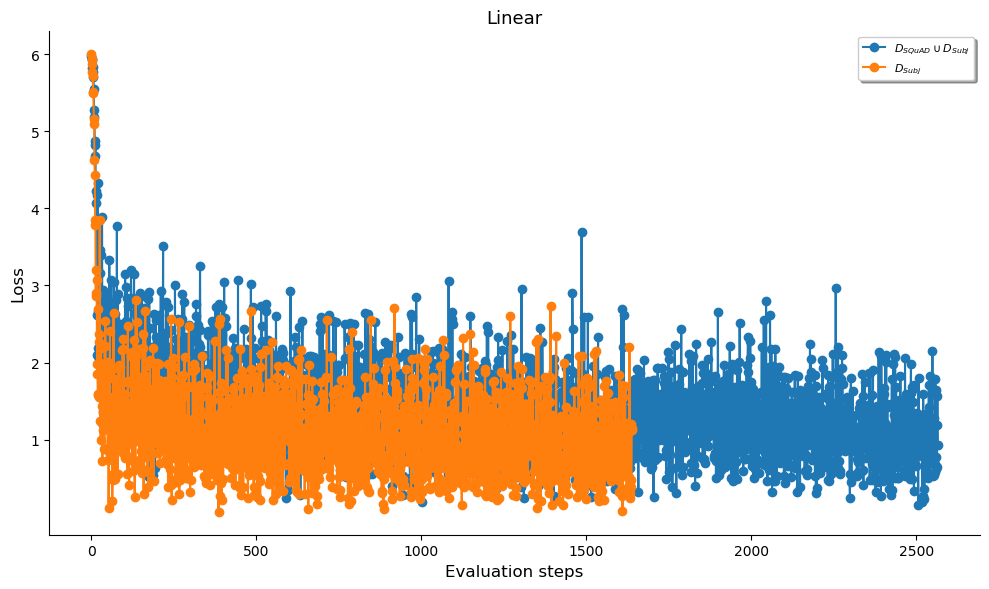

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

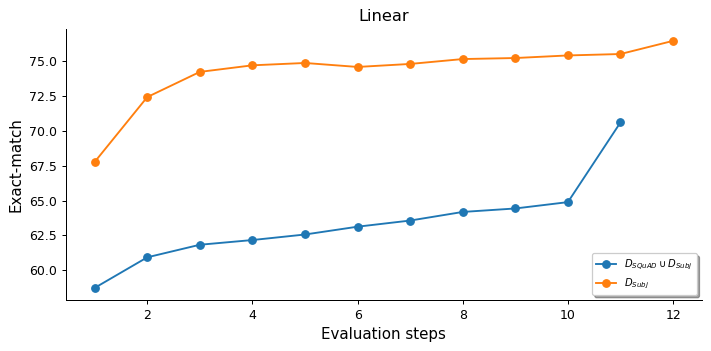

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

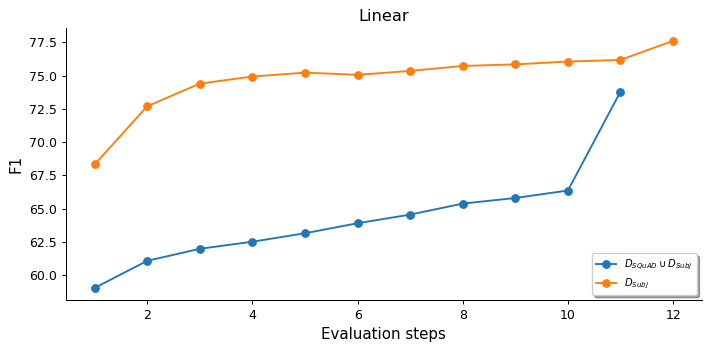

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

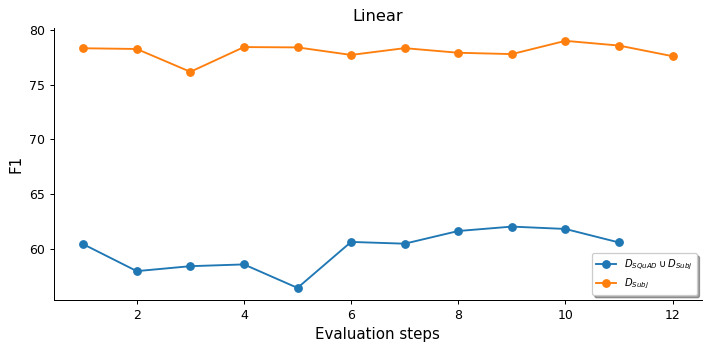

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

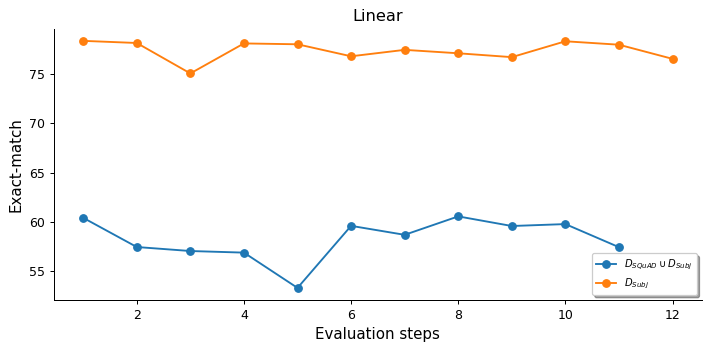

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

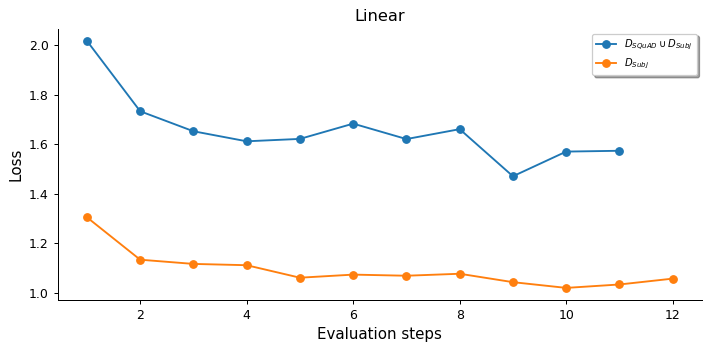

====== Model: HIGHWAY ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

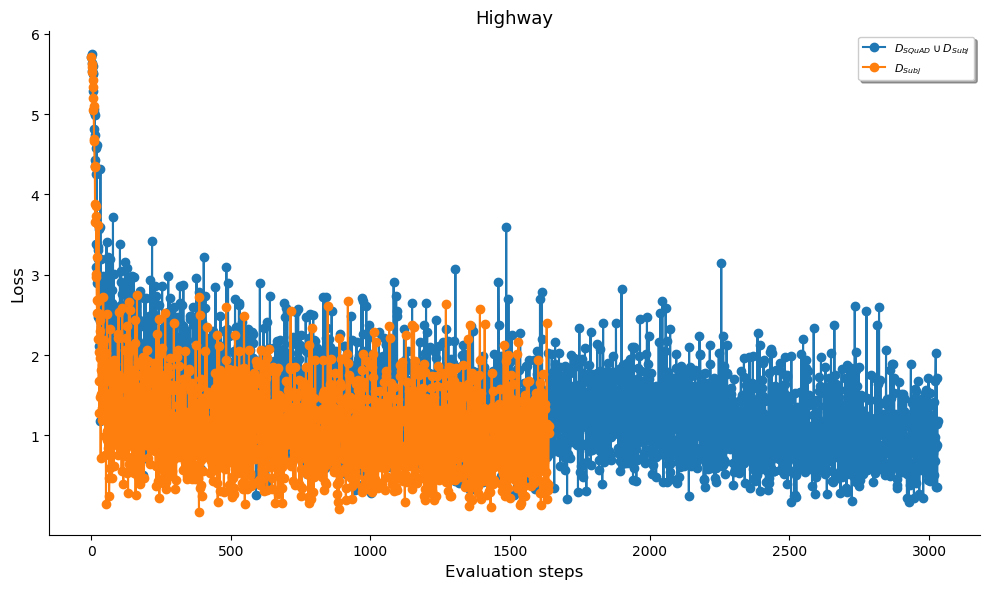

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

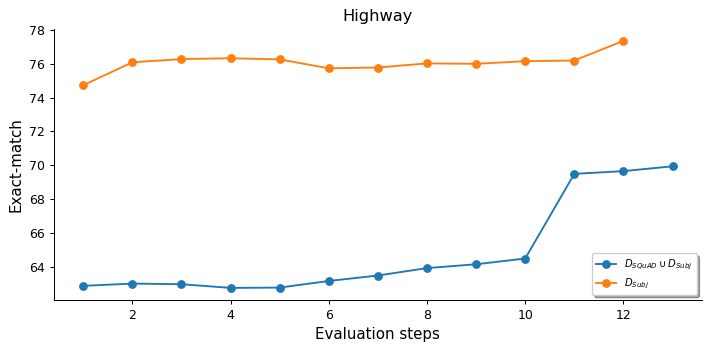

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

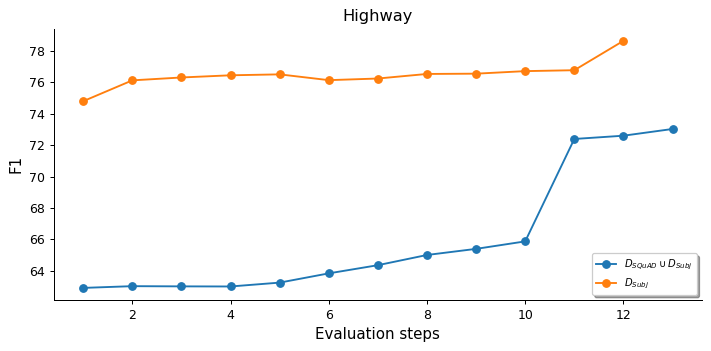

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

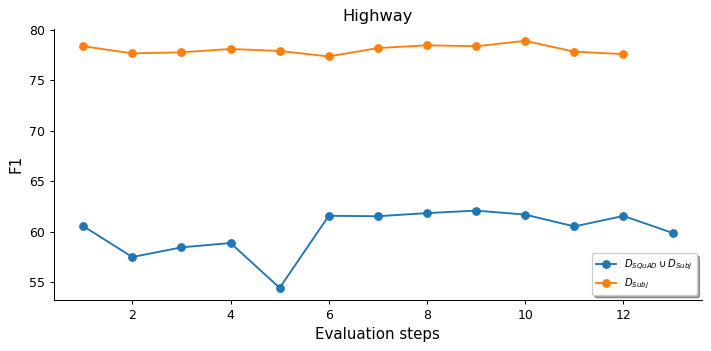

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

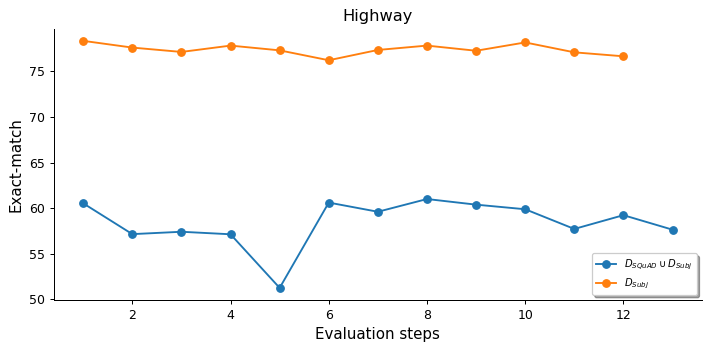

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

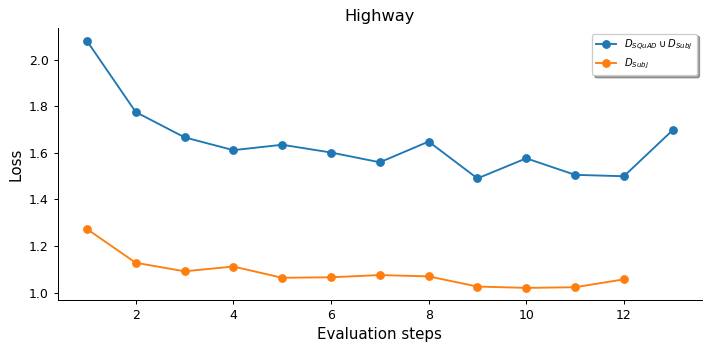

====== Model: RECURRENT ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

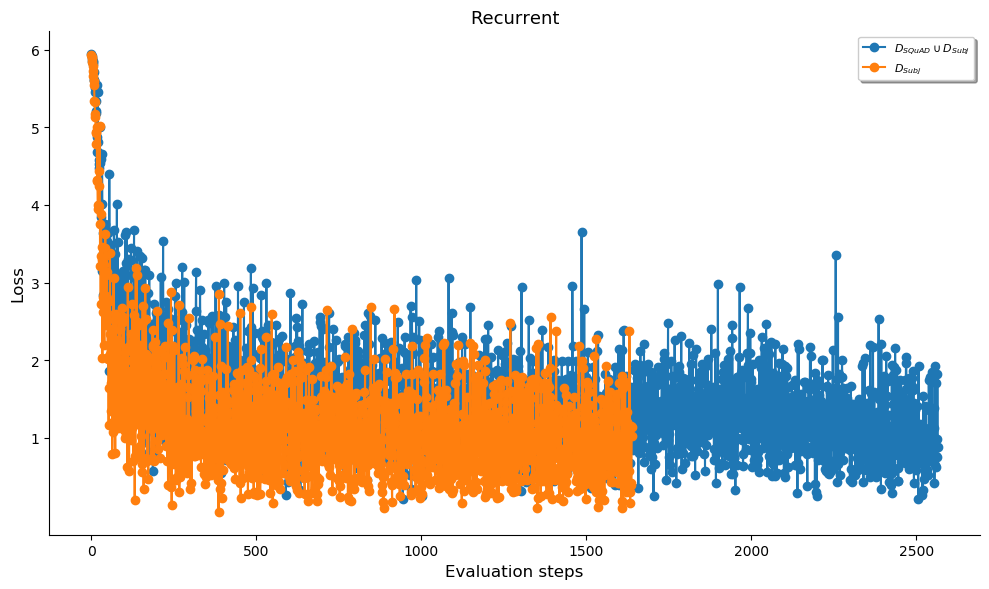

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

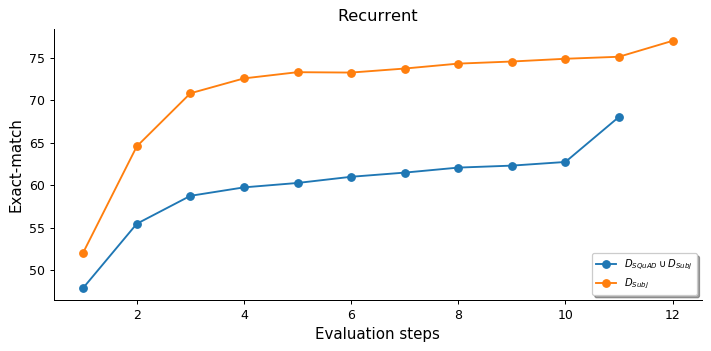

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

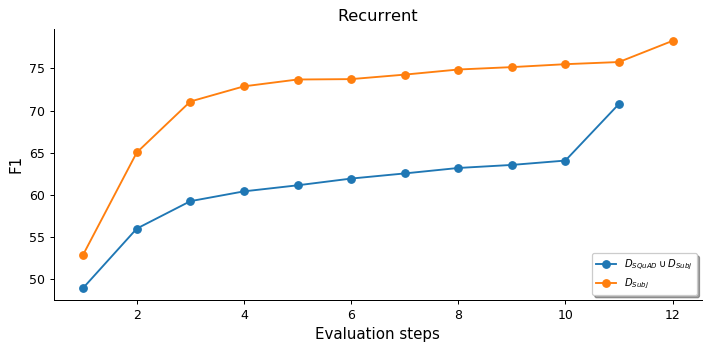

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

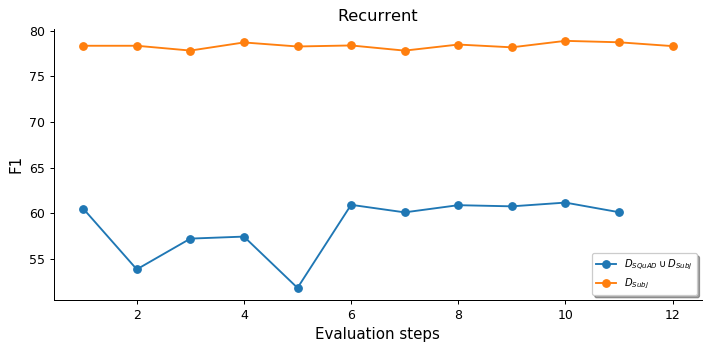

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

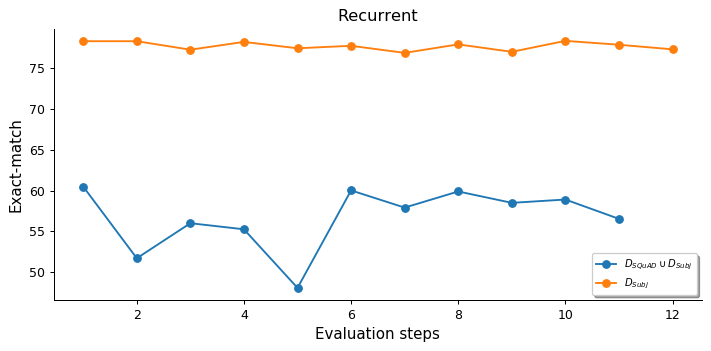

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

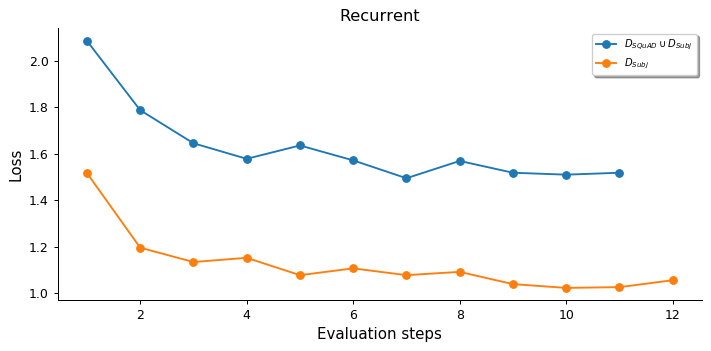

====== Model: RECURRENT_HIGHWAY ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

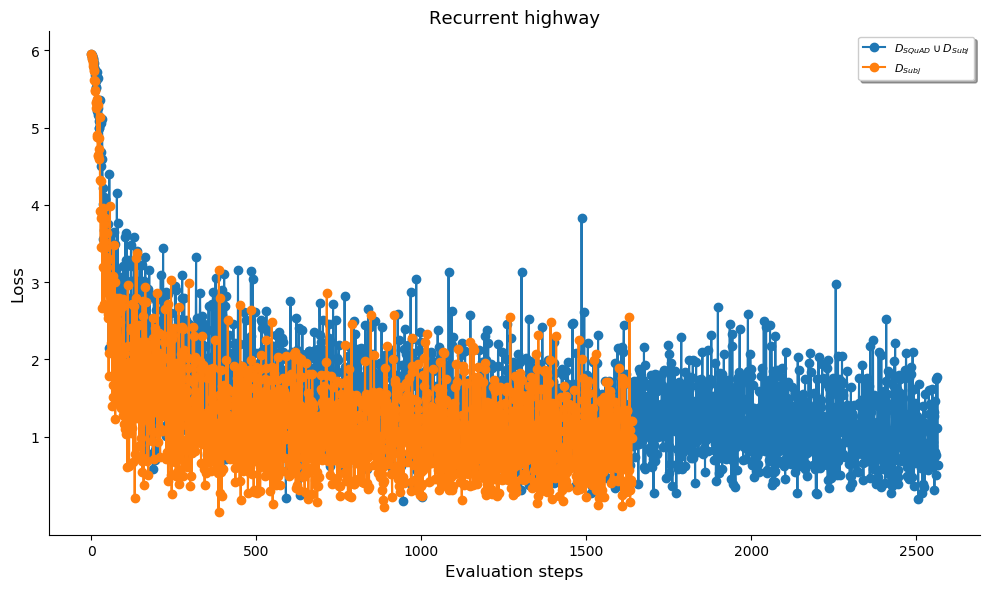

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

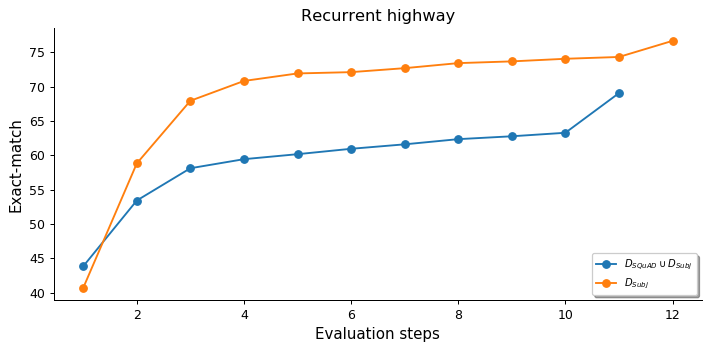

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

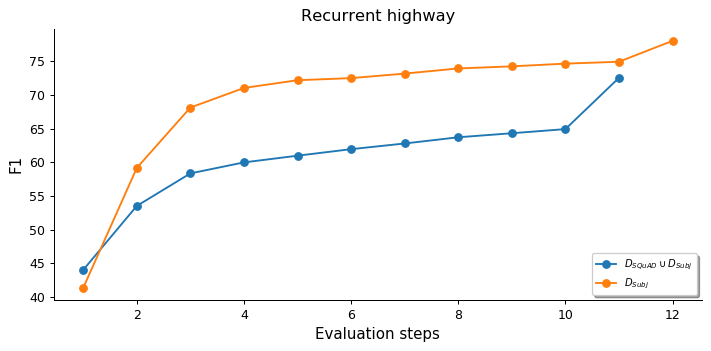

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

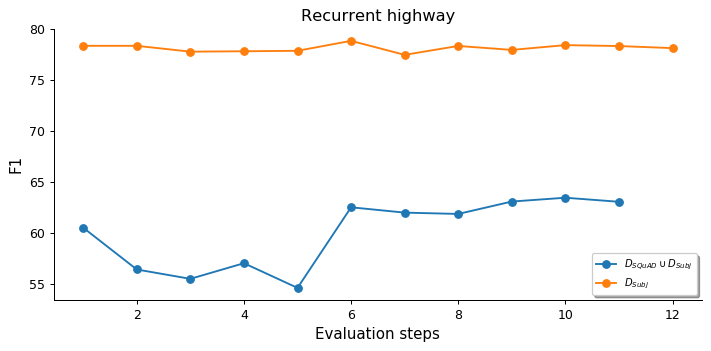

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

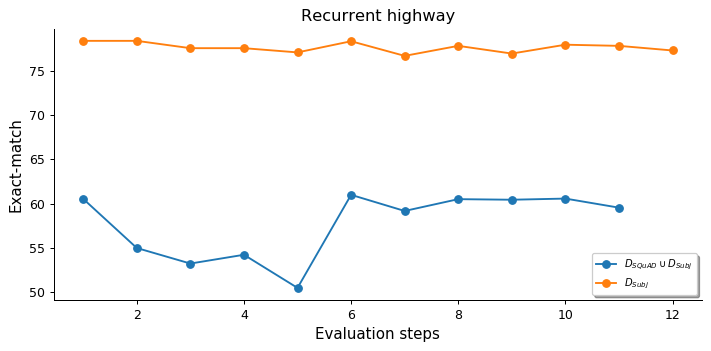

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

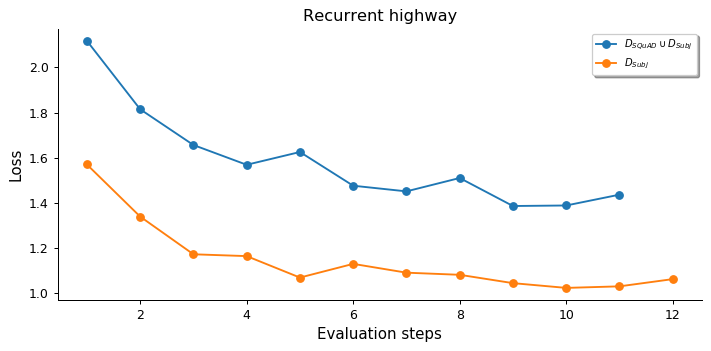

<Figure size 432x288 with 0 Axes>

In [4]:
## Normal (non-adversarial) models
models = ['linear', 'highway', 'recurrent', 'recurrent_highway']
aux = None

plotting(models=models, metrics=metrics, task=task, version=version, task_setting=task_setting, iv=iv, aux=aux)

## Performance over time (evaluation steps) - comparison across $\tilde f$  \textit{ (i.e., models)}

In [5]:
# specify general hyperparameters
models = ['combined', 'SubjQA']

metrics = ['batch_loss', 'batch_acc', 'batch_f1', 'val_f1', 'val_acc', 'val_loss']

task='QA'
version = 'train'
task_setting ='single'
iv = 'models'
aux = 'aux_1'

====== Task: QA ======

====== Model: COMBINED ======

===== Metric: BATCH_LOSS =====



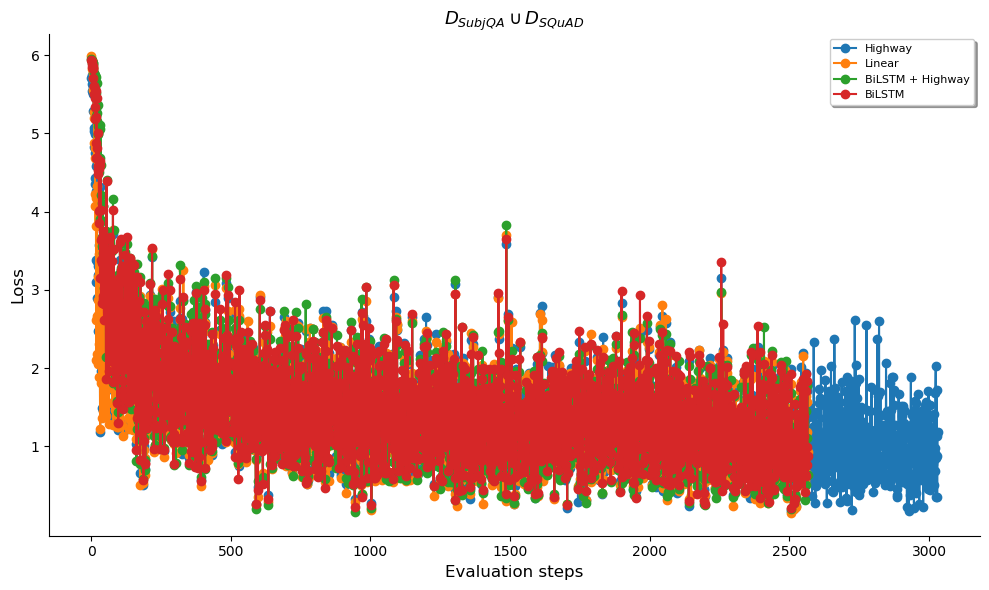

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

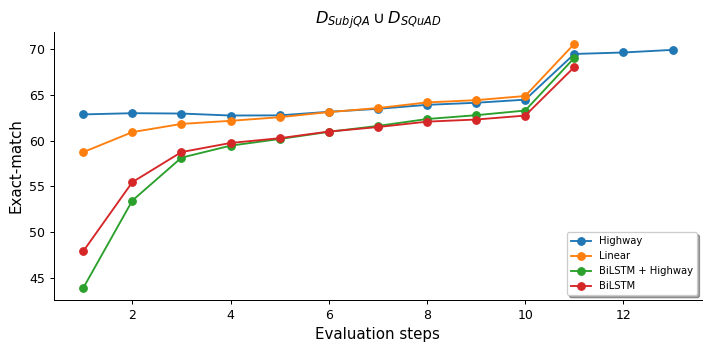

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

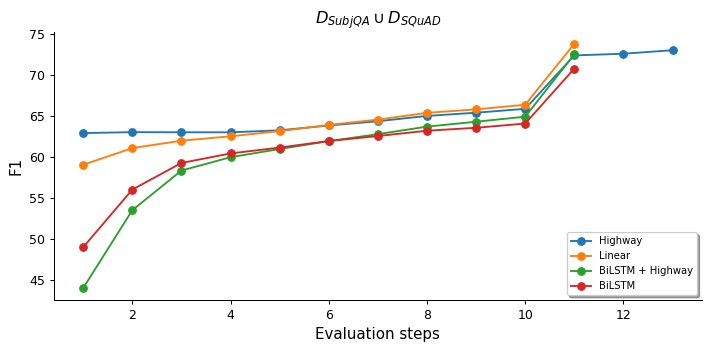

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

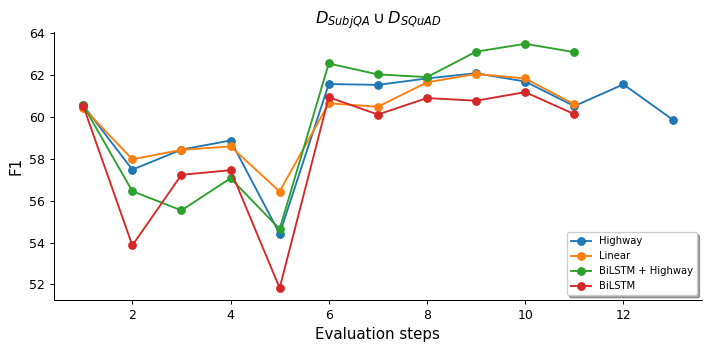

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

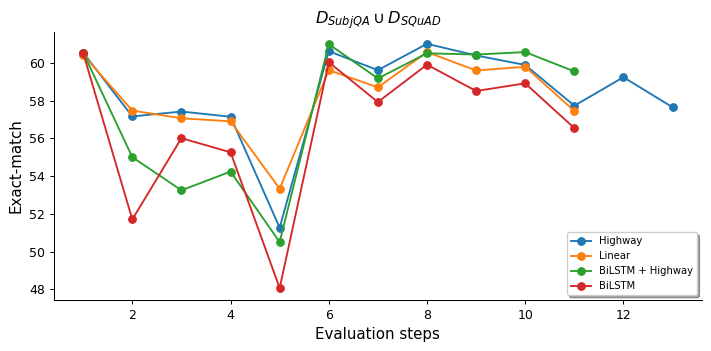

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

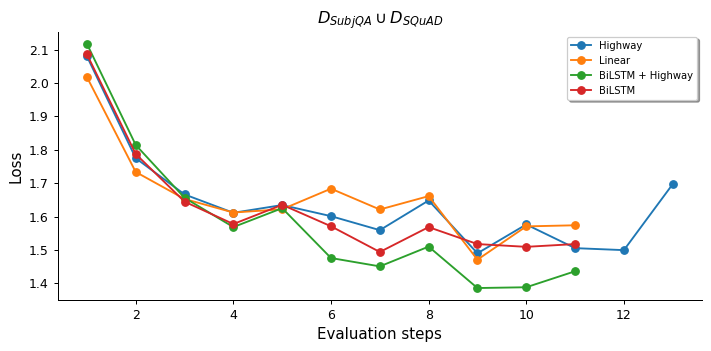

====== Model: SUBJQA ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

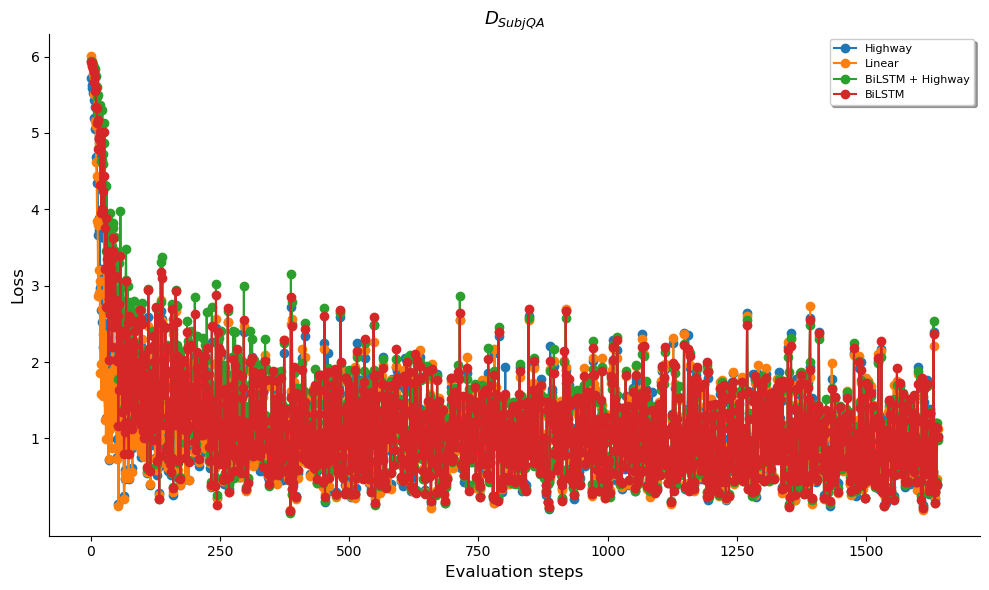

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

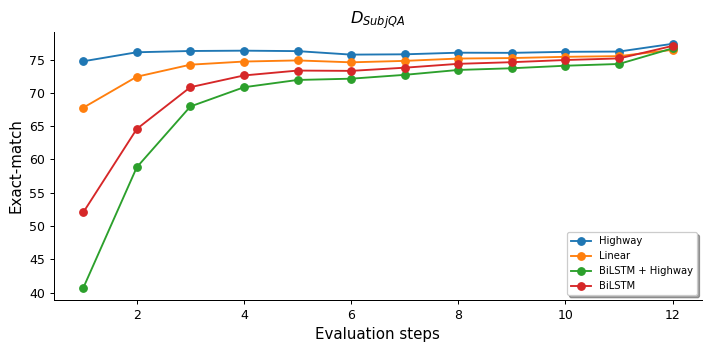

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

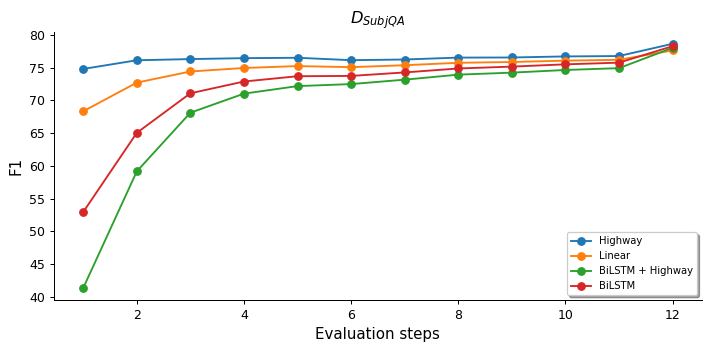

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

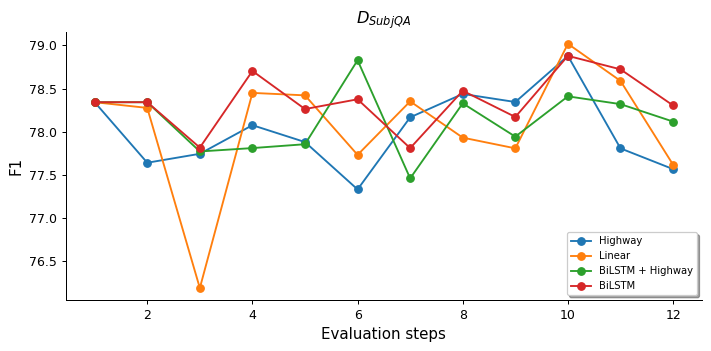

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

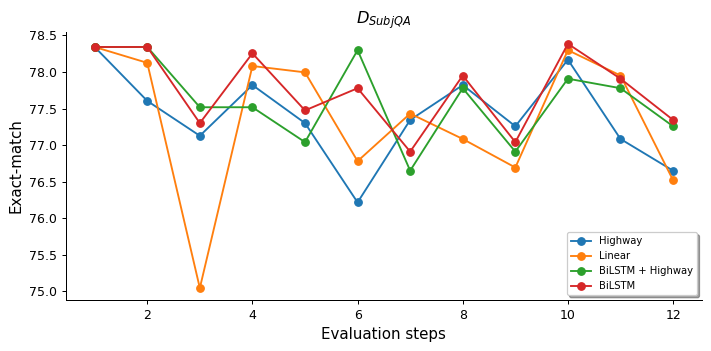

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

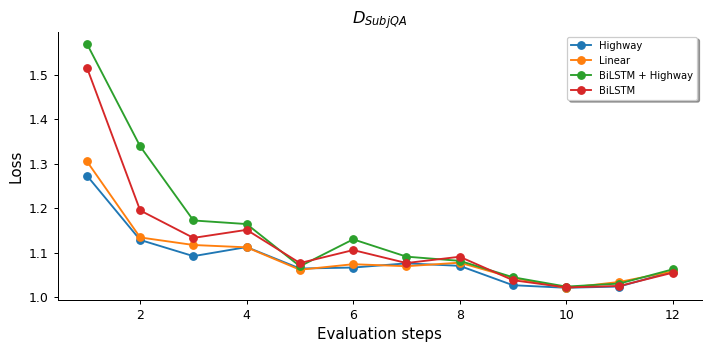

<Figure size 432x288 with 0 Axes>

In [6]:
plotting(models=models, metrics=metrics, task=task, version=version, task_setting=task_setting, iv=iv, aux=aux)

In [7]:
# specify general hyperparameters
models = ['combined', 'SubjQA']
layers = ['linear', 'recurrent']
sampling_strategies = ['uniformsampling', 'oversampling']

metrics = ['batch_loss', 'batch_acc', 'batch_f1', 'val_f1', 'val_acc', 'val_loss']

task='QA'
version = 'train'
task_setting ='multi'
iv = 'models'
aux = 'aux_1'

======= Layer: LINEAR ======

======= Sampling: UNIFORMSAMPLING ======

====== Task: QA ======

====== Model: COMBINED ======

===== Metric: BATCH_LOSS =====



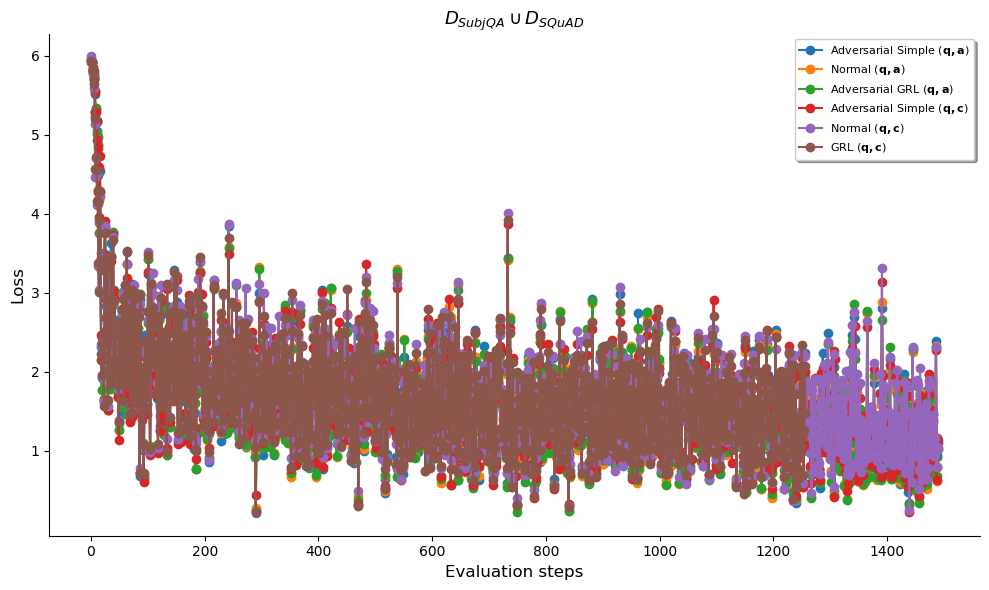

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

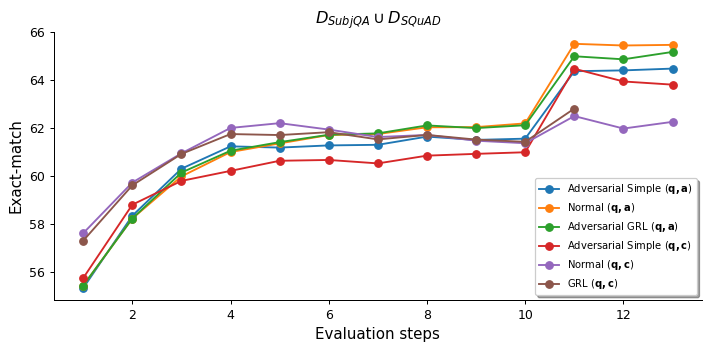

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

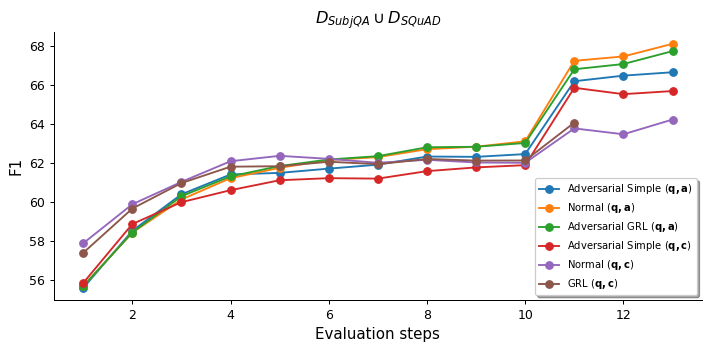

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

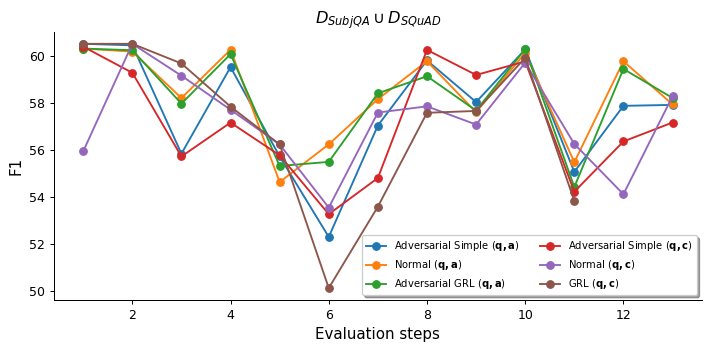

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

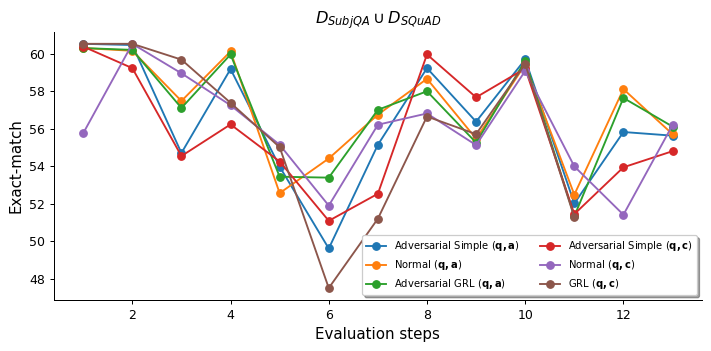

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

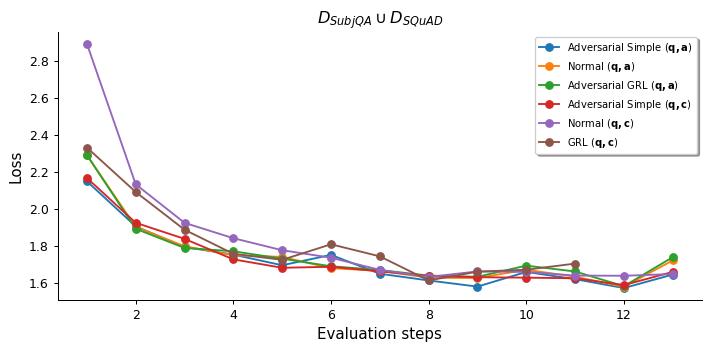

====== Model: SUBJQA ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

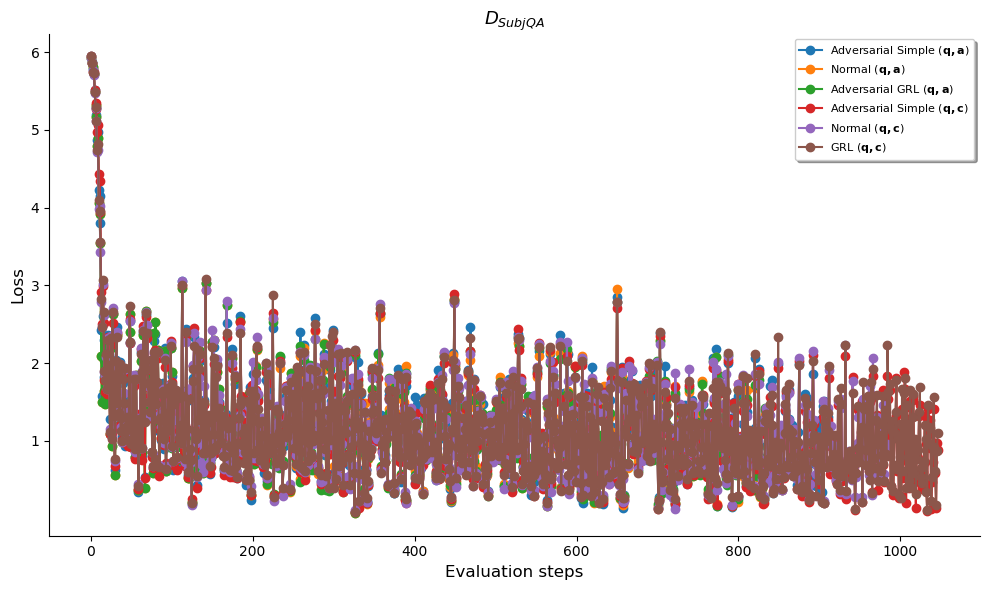

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

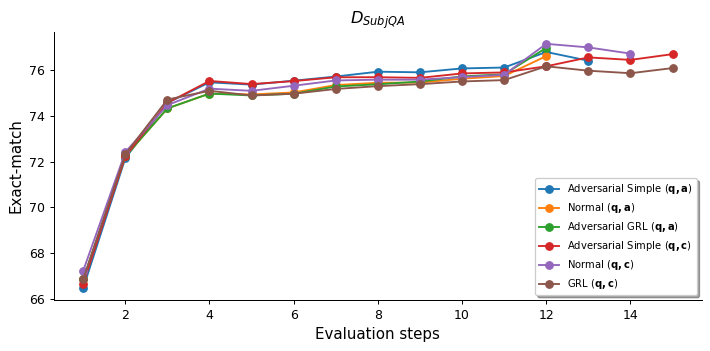

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

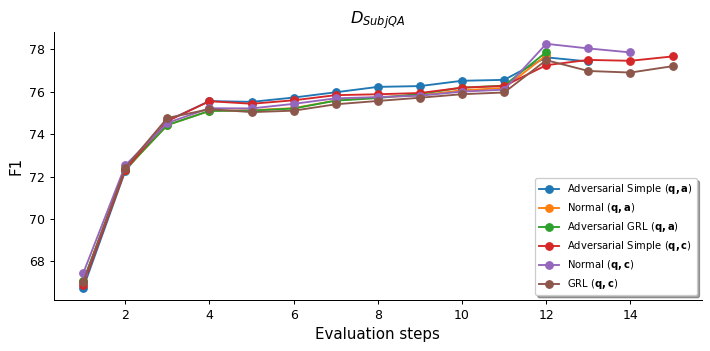

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

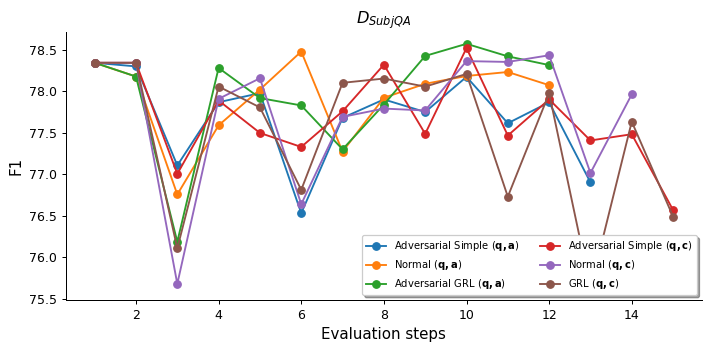

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

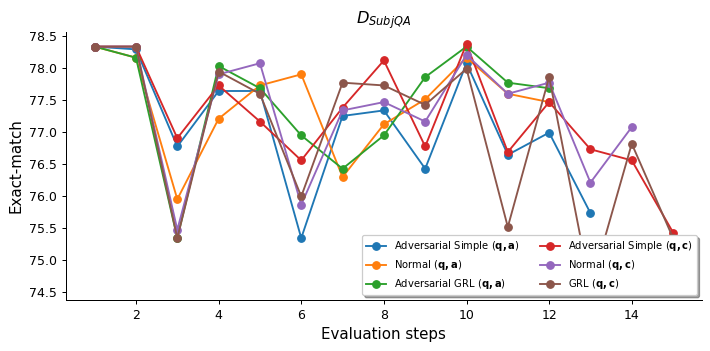

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

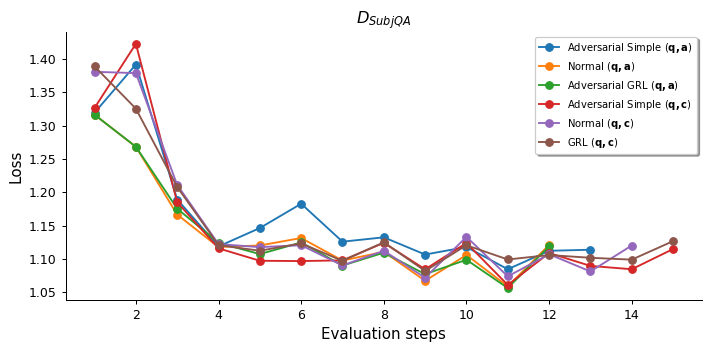

No handles with labels found to put in legend.


======= Layer: LINEAR ======

======= Sampling: OVERSAMPLING ======

====== Task: QA ======

====== Model: COMBINED ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

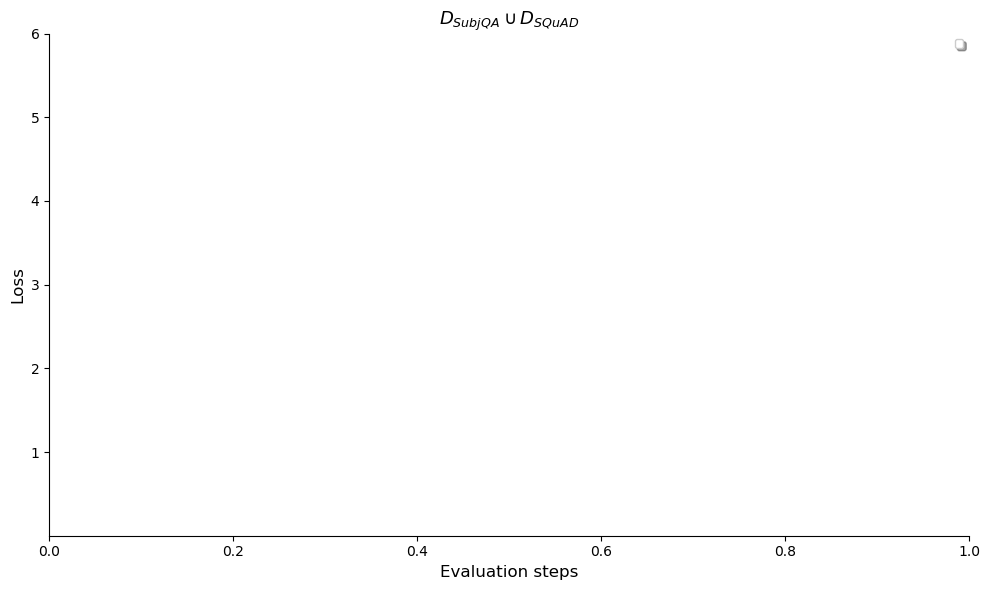

No handles with labels found to put in legend.


===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

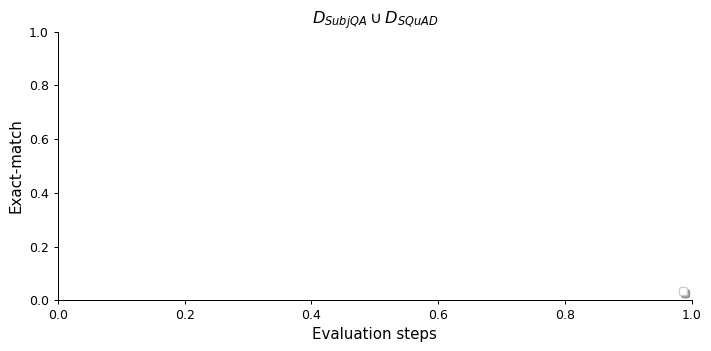

No handles with labels found to put in legend.


===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

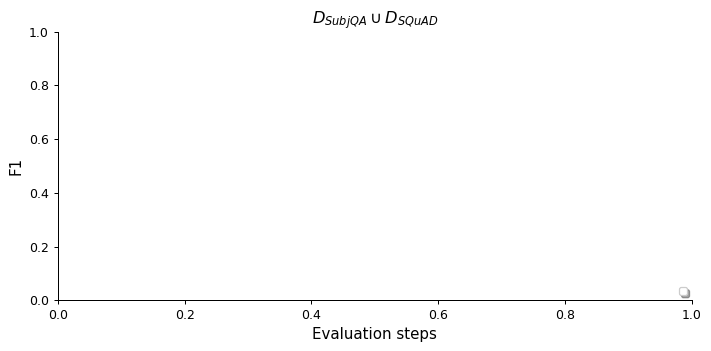

No handles with labels found to put in legend.


===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

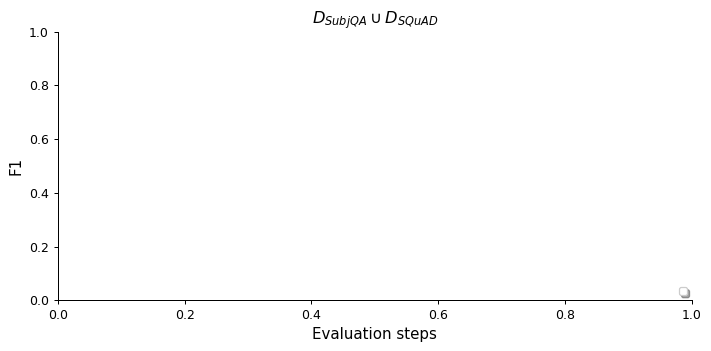

No handles with labels found to put in legend.


===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

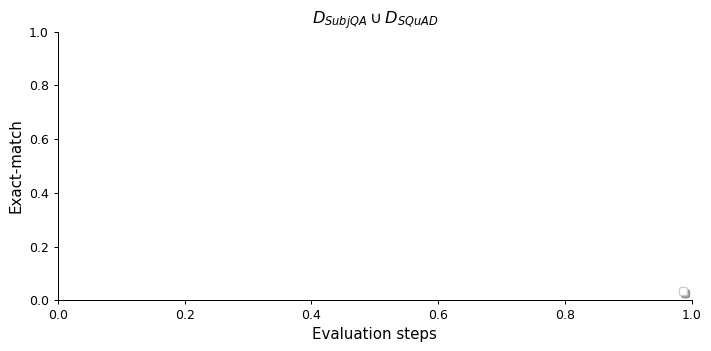

No handles with labels found to put in legend.


===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

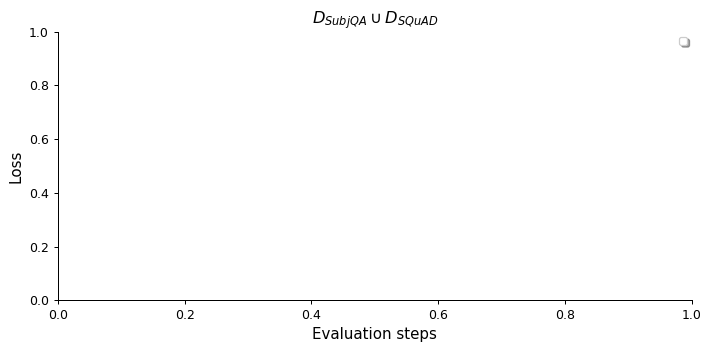

====== Model: SUBJQA ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

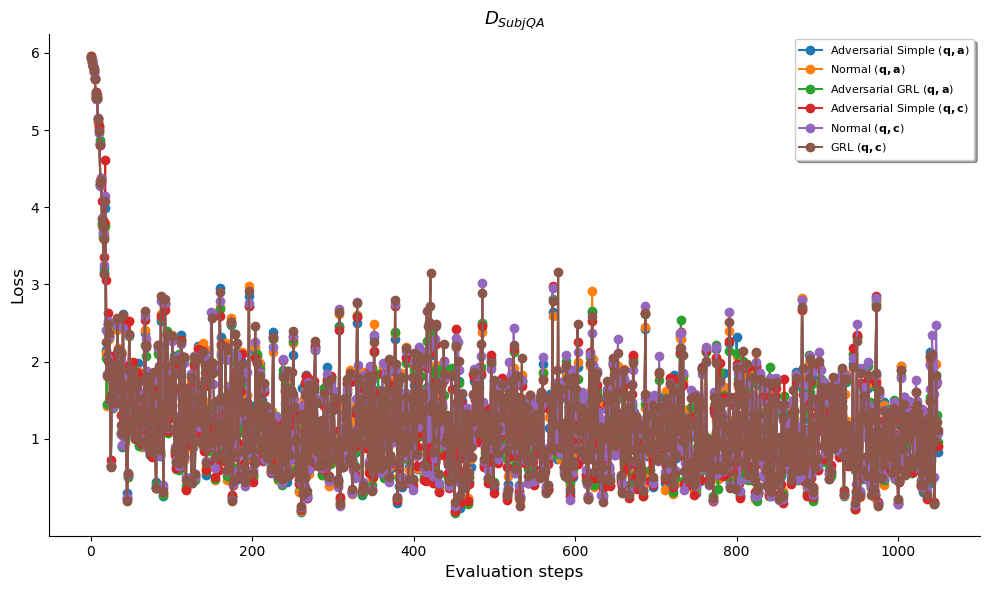

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

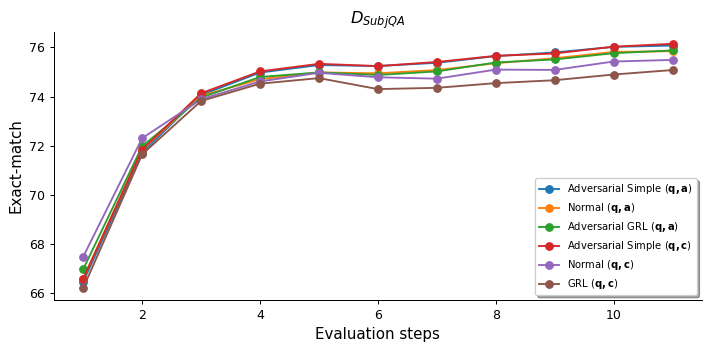

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

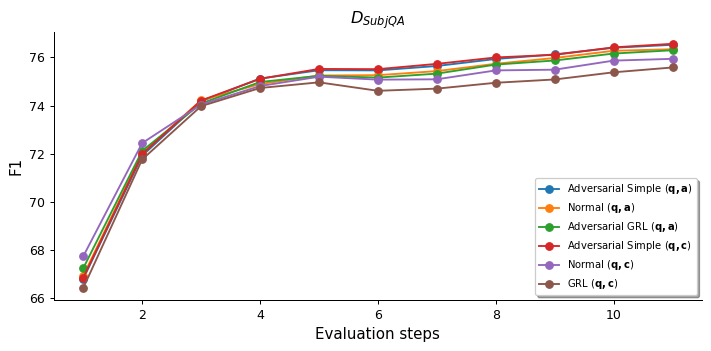

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

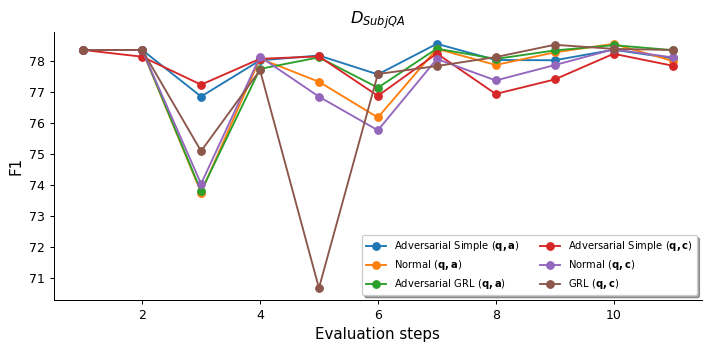

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

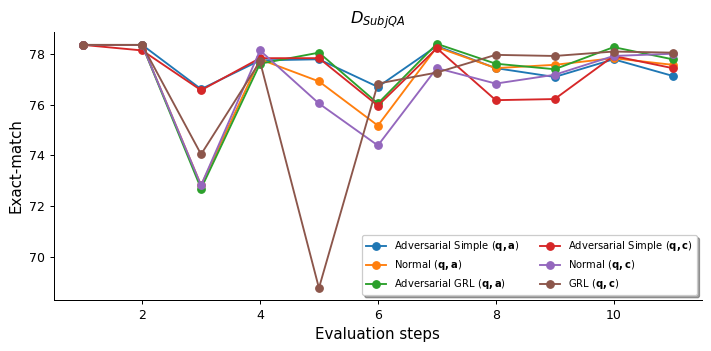

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

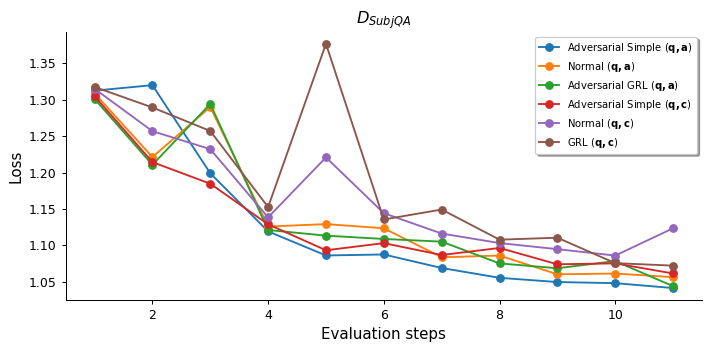

======= Layer: BiLSTM ======

======= Sampling: UNIFORMSAMPLING ======

====== Task: QA ======

====== Model: COMBINED ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

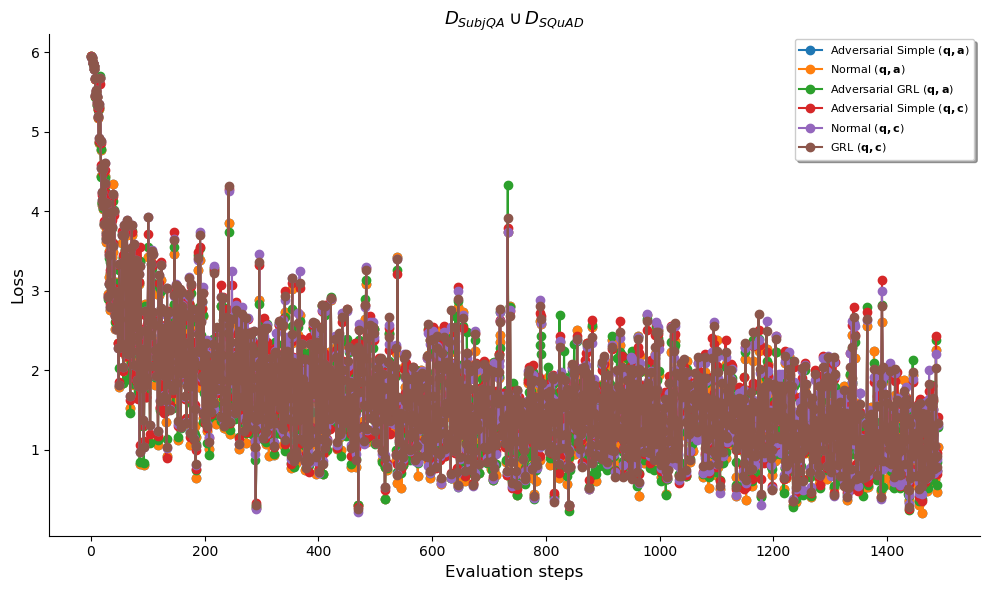

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

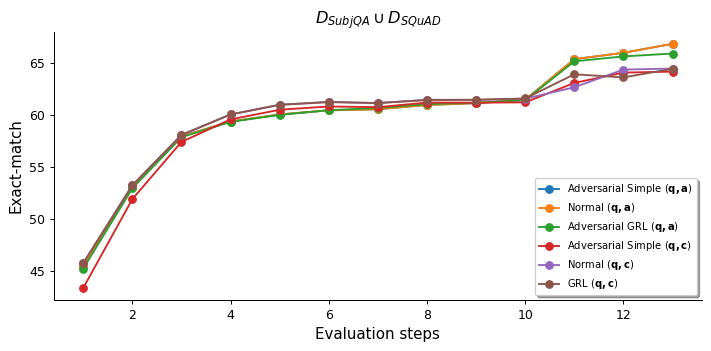

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

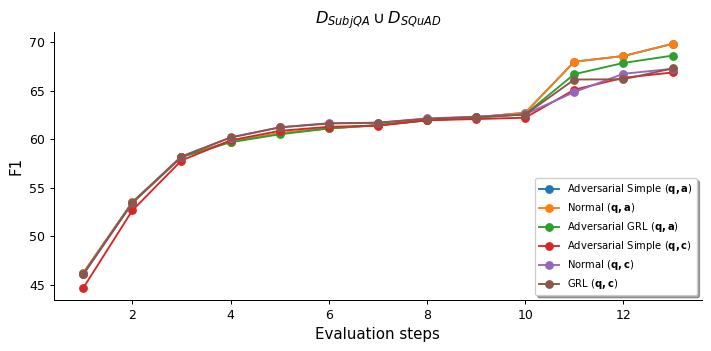

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

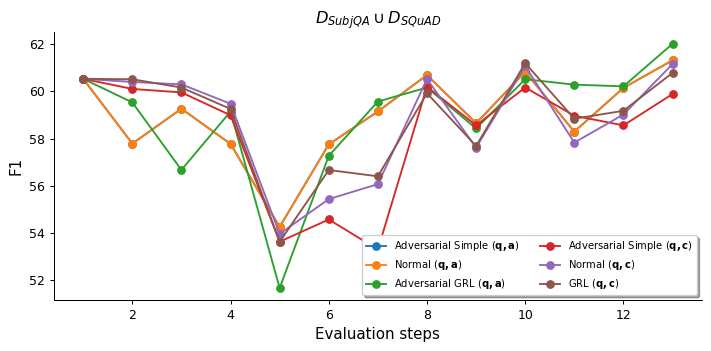

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

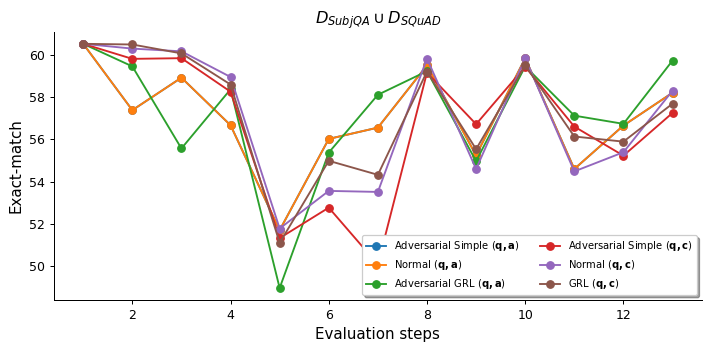

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

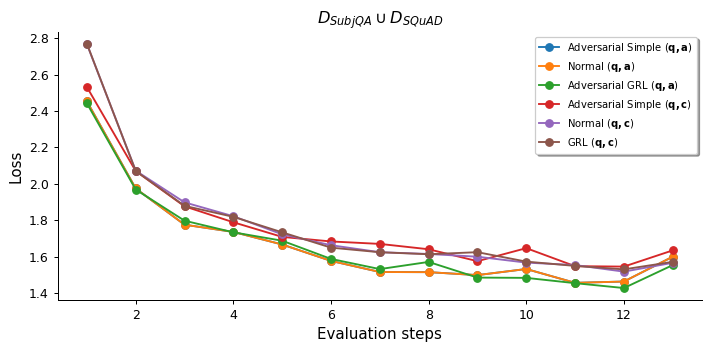

====== Model: SUBJQA ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

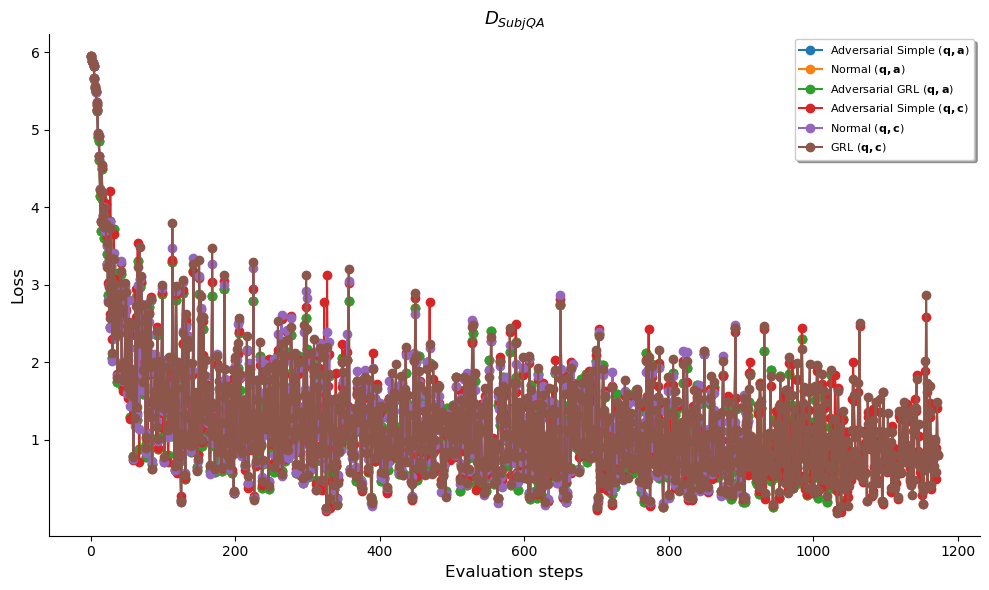

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

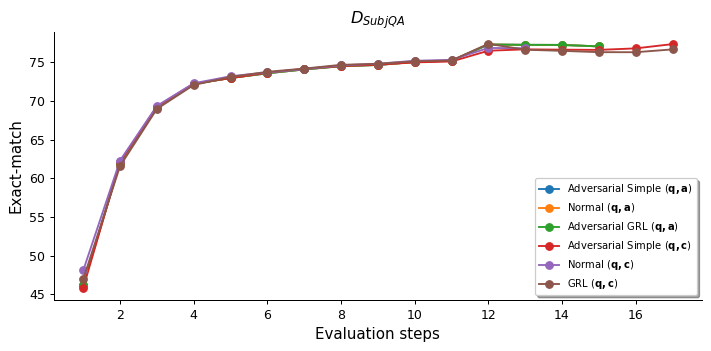

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

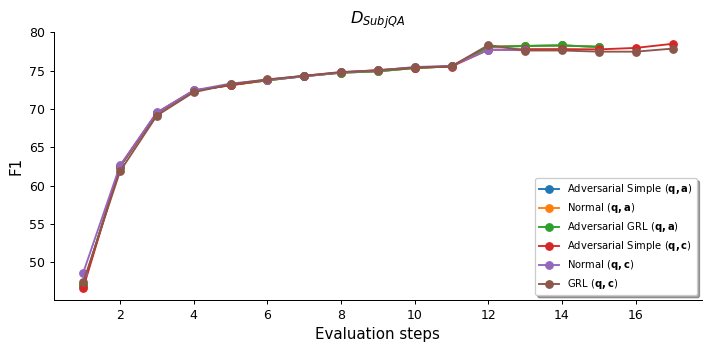

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

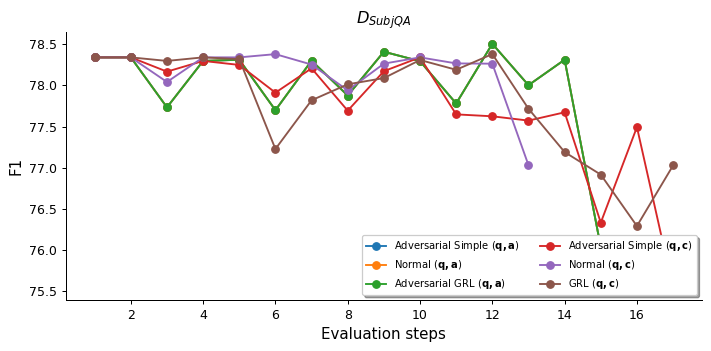

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

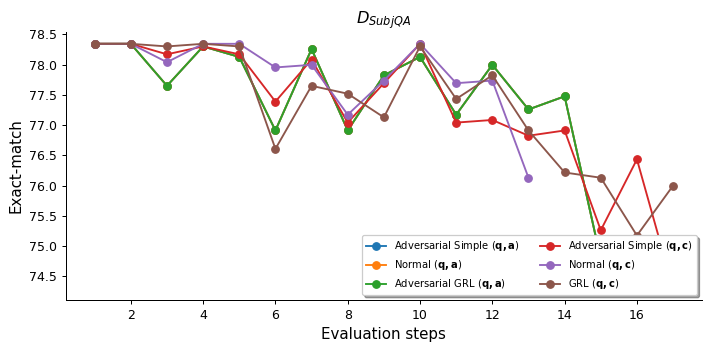

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

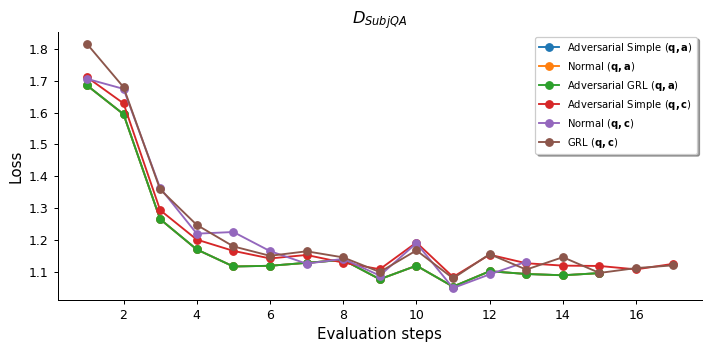

No handles with labels found to put in legend.


======= Layer: BiLSTM ======

======= Sampling: OVERSAMPLING ======

====== Task: QA ======

====== Model: COMBINED ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

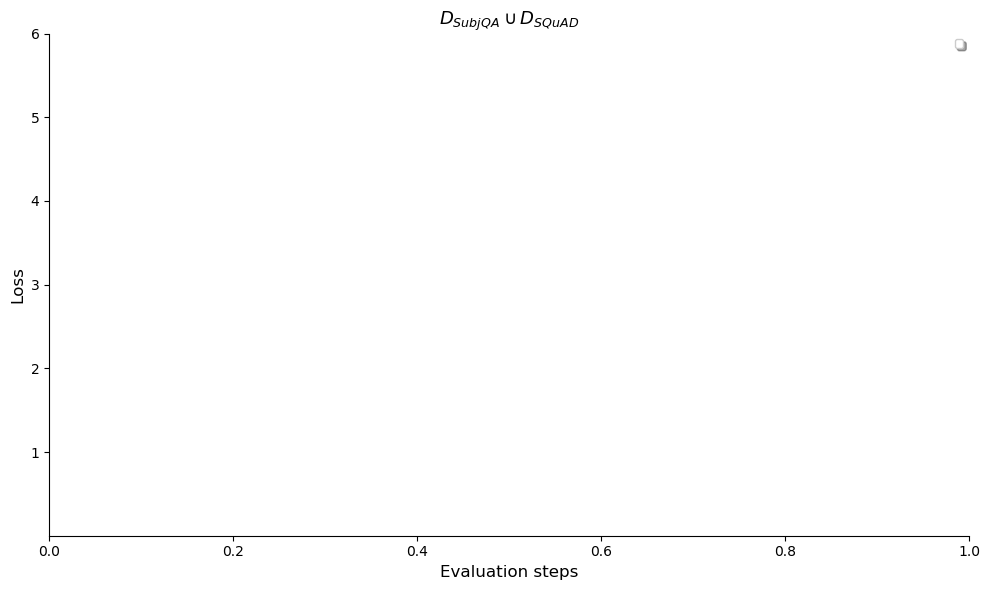

No handles with labels found to put in legend.


===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

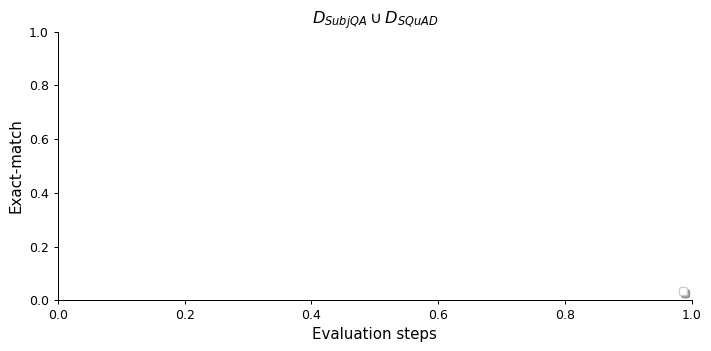

===== Metric: BATCH_F1 =====



No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

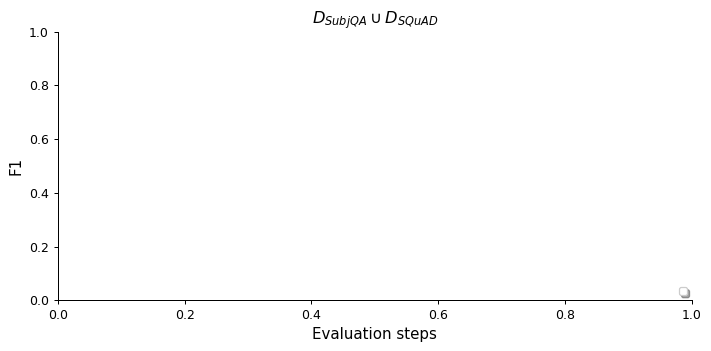

No handles with labels found to put in legend.


===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

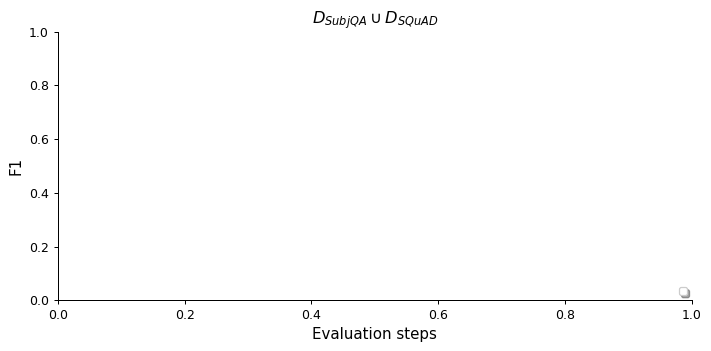

No handles with labels found to put in legend.


===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

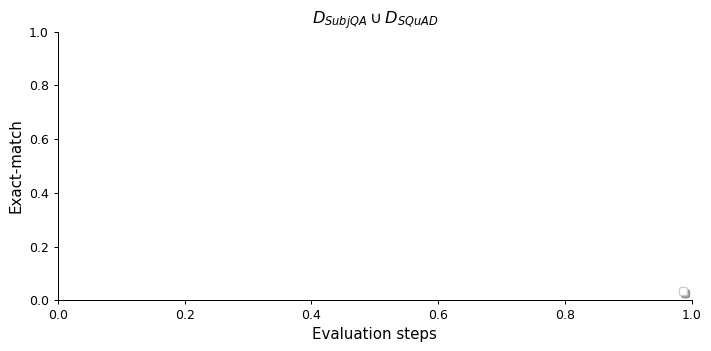

No handles with labels found to put in legend.


===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

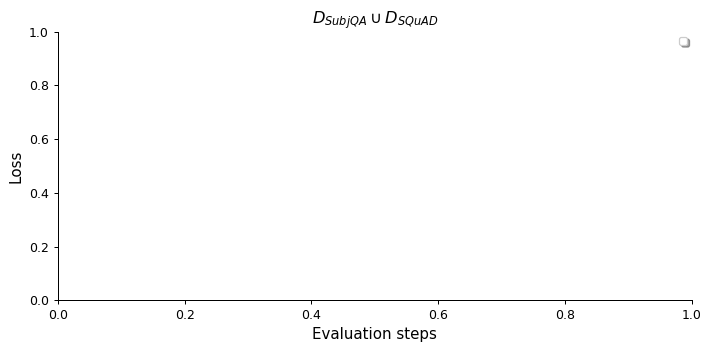

====== Model: SUBJQA ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

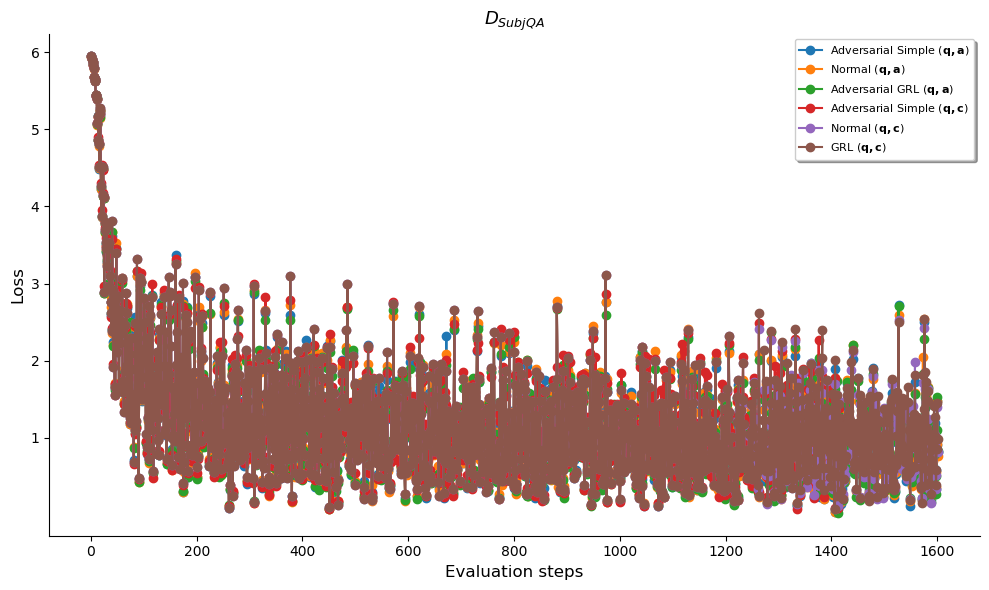

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

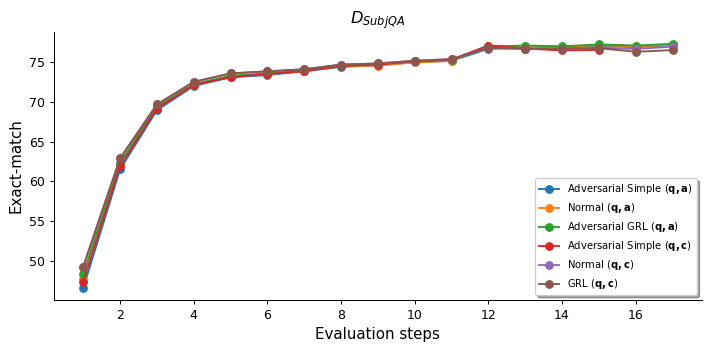

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

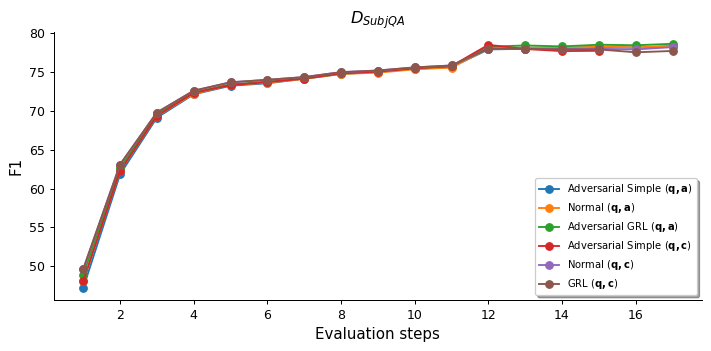

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

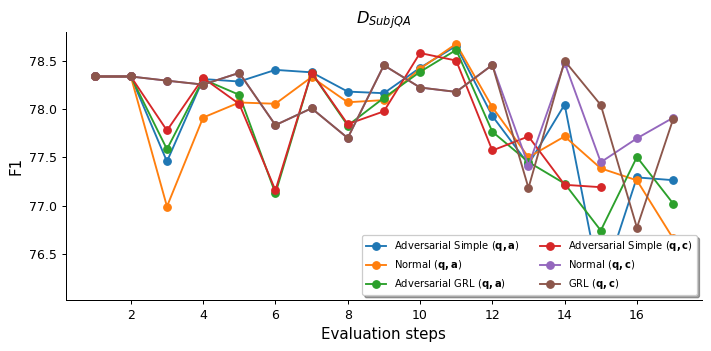

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

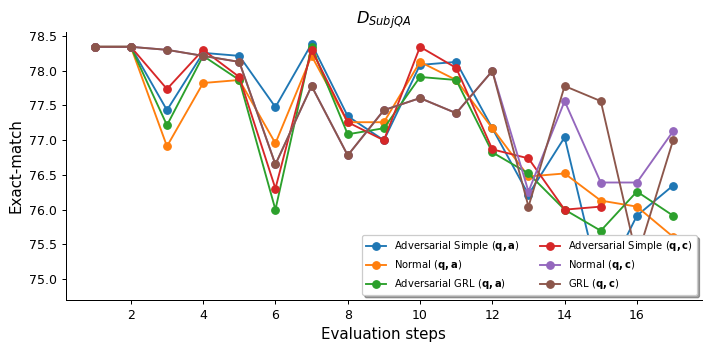

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

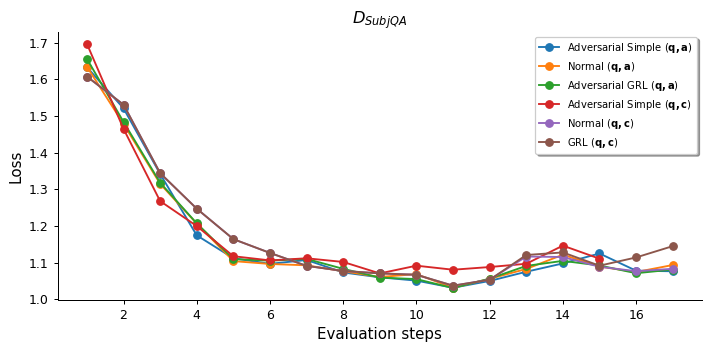

<Figure size 432x288 with 0 Axes>

In [8]:
# plot results
for layer in layers:
    for task_sampling in sampling_strategies:
        print('==========================')
        print('======= Layer: {} ======'.format('BiLSTM' if layer == 'recurrent' else layer.upper()))
        print('==========================')
        print()
        print('==================================')
        print('======= Sampling: {} ======'.format(task_sampling.upper()))
        print('==================================')
        print()
        plotting(
                 models=models,
                 metrics=metrics,
                 task=task,
                 version=version,
                 task_setting=task_setting,
                 iv=iv,
                 layer=layer,
                 aux=aux,
                 task_sampling=task_sampling,
        )

## \textit{Correlation plots}: performance on dev set as a function of performance on train set

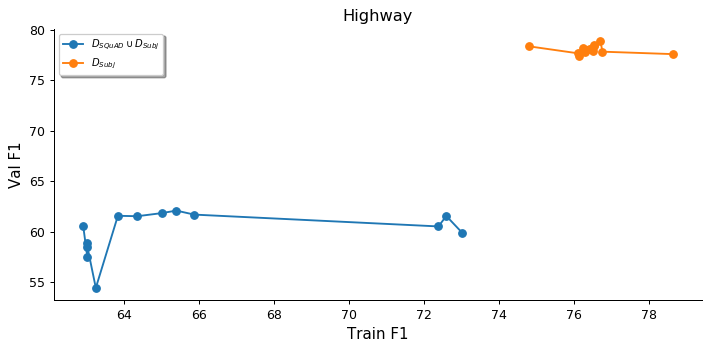

<Figure size 432x288 with 0 Axes>

In [9]:
task = 'QA'
version = 'train'
model = 'highway'
task_setting = 'single'
iv = 'datasets'
metric = ''

all_results = get_results(task=task, version=version, model=model, task_setting=task_setting, aux=None)
plot_results(all_results, task=task, metric=metric, iv=iv,  model=model, task_setting=task_setting, aux=None, correlation=True)

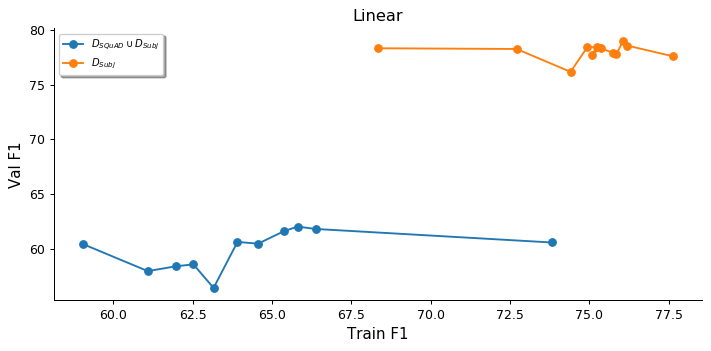

<Figure size 432x288 with 0 Axes>

In [10]:
task = 'QA'
version = 'train'
model = 'linear'
task_setting = 'single'
iv = 'datasets'
metric = ''

all_results = get_results(task=task, version=version, model=model, task_setting=task_setting, aux=None)
plot_results(all_results,task=task, metric=metric, iv=iv,  model=model, task_setting=task_setting, aux=None, correlation=True)

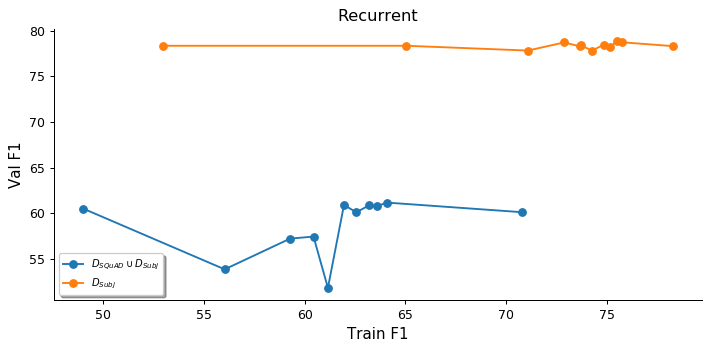

<Figure size 432x288 with 0 Axes>

In [11]:
task = 'QA'
version = 'train'
model = 'recurrent'
task_setting = 'single'
iv = 'datasets'
metric = ''

all_results = get_results(task=task, version=version, model=model, task_setting=task_setting, aux=None)
plot_results(all_results,task=task, metric=metric, iv=iv,  model=model, task_setting=task_setting, aux=None, correlation=True)

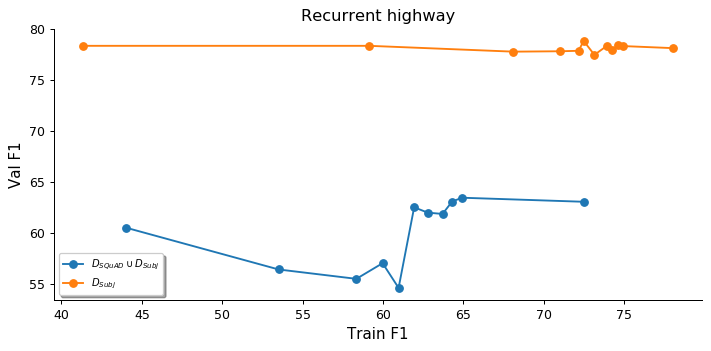

<Figure size 432x288 with 0 Axes>

In [12]:
task = 'QA'
version = 'train'
model = 'recurrent_highway'
task_setting = 'single'
iv = 'datasets'
metric = ''

all_results = get_results(task=task, version=version, model=model, task_setting=task_setting, aux=None)
plot_results(all_results,task=task, metric=metric, iv=iv,  model=model, task_setting=task_setting, aux=None, correlation=True)

In [13]:
task = 'QA'
version = 'train'
model = 'adversarial'
task_setting = 'multi'
iv = 'methods'
metric = ''
aux = 'aux_1'

all_results = get_results(task=task, version=version, model=model, task_setting=task_setting, aux=aux)
plot_results(all_results, task=task, metric=metric, iv=iv,  model=model, task_setting=task_setting, aux=aux, correlation=True)

AssertionError: When comparing across adversarial models in aux_1, subfolder for model type must be provided

# Subjectivity Classification

## Performance over time (evaluation steps) - comparison across $D_{i \in \{Subj, Subj \cup Squad\}}$

In [14]:
# specify general hyperparameters

task='sbj_class'
task_setting ='single'
version = 'train'
metrics = ['batch_loss', 'batch_acc', 'batch_f1', 'val_f1', 'val_acc', 'val_loss']

In [15]:
# specify specific hyperparameters
models = ['linear', 'highway', 'recurrent', 'recurrent_highway']
iv = 'datasets'

====== Task: SBJ_CLASS ======

====== Model: LINEAR ======

===== Metric: BATCH_LOSS =====



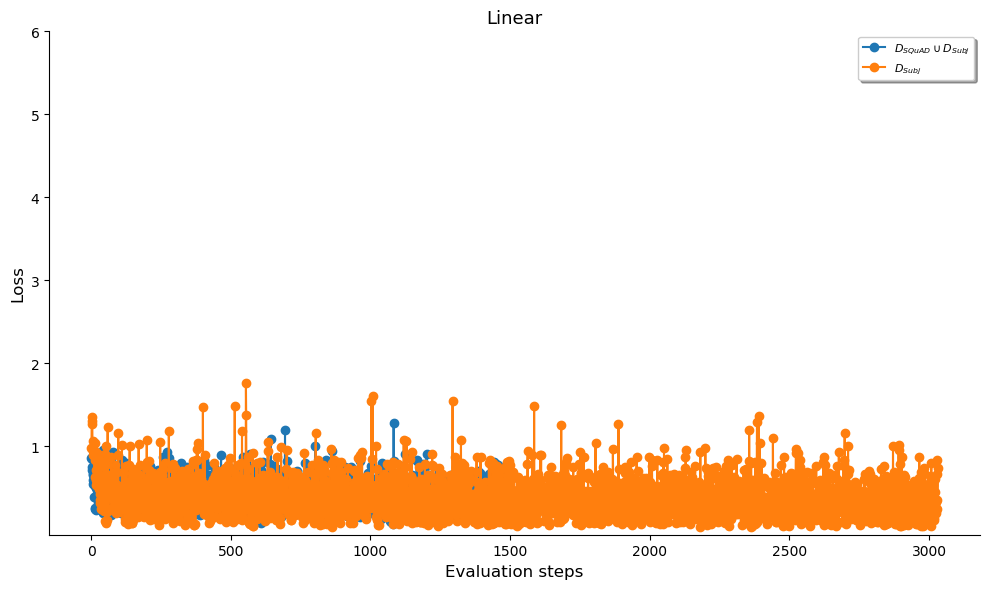

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

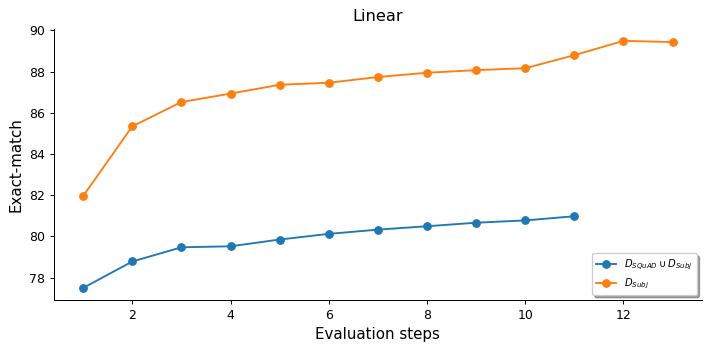

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

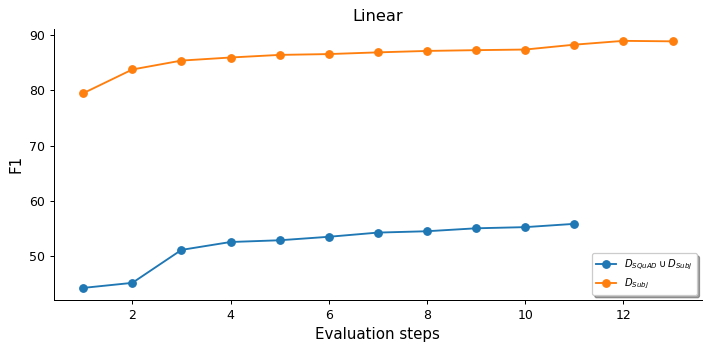

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

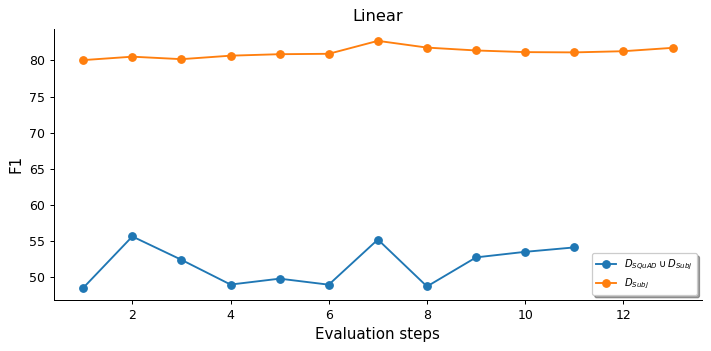

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

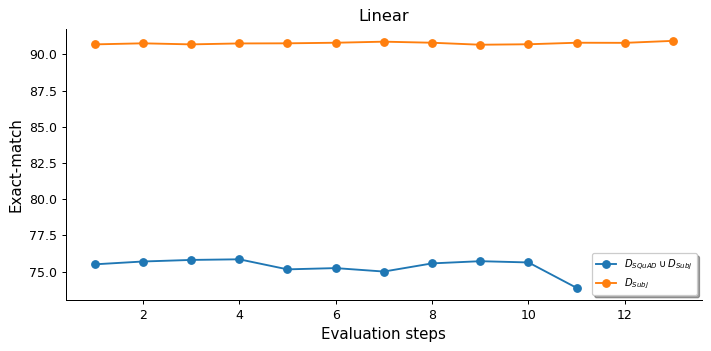

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

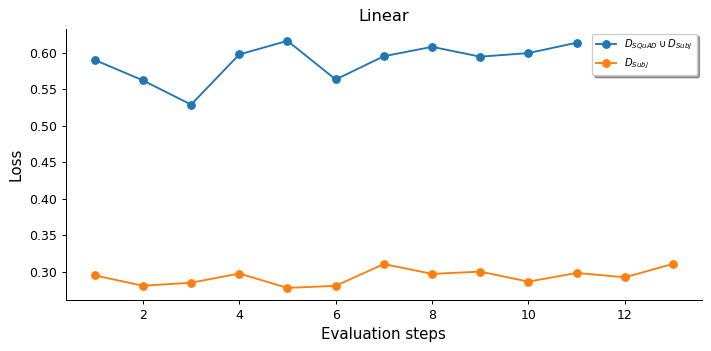

====== Model: HIGHWAY ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

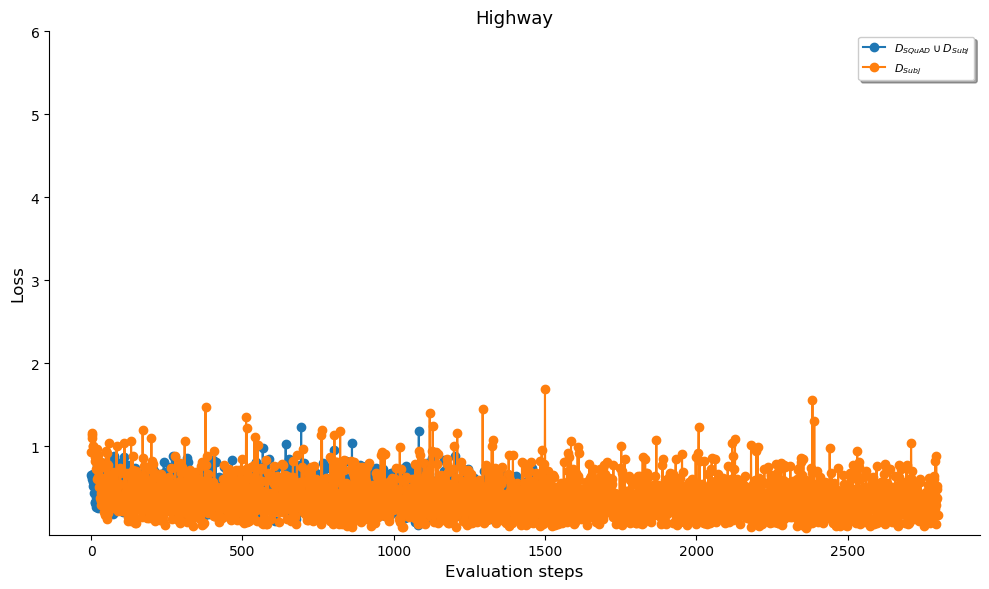

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

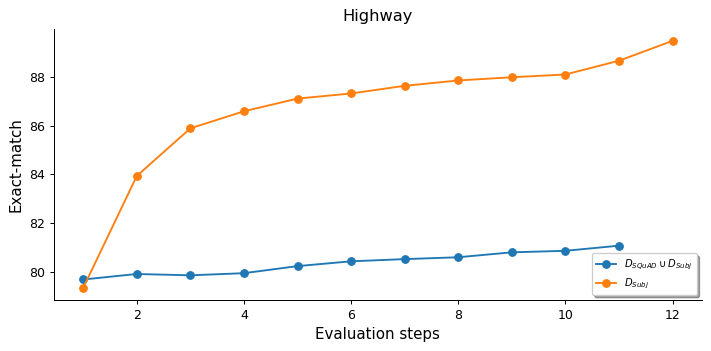

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

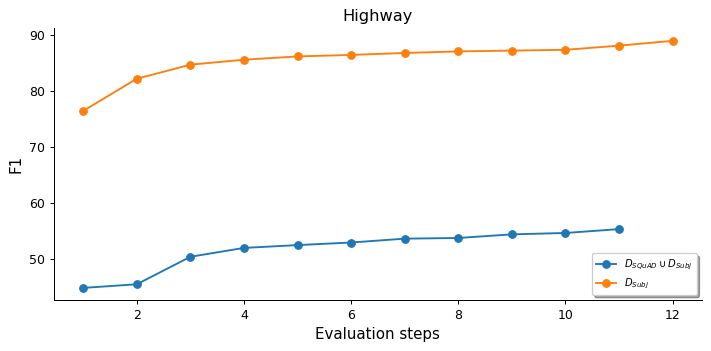

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

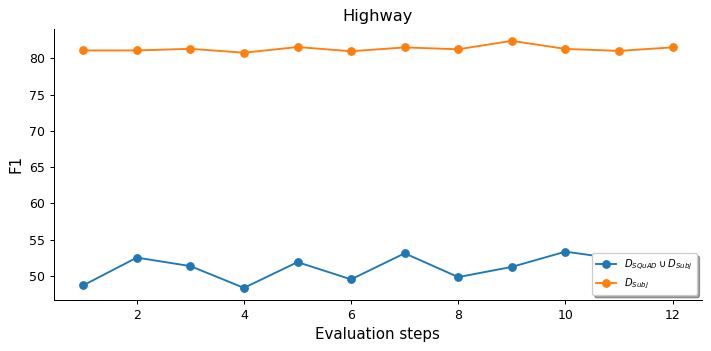

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

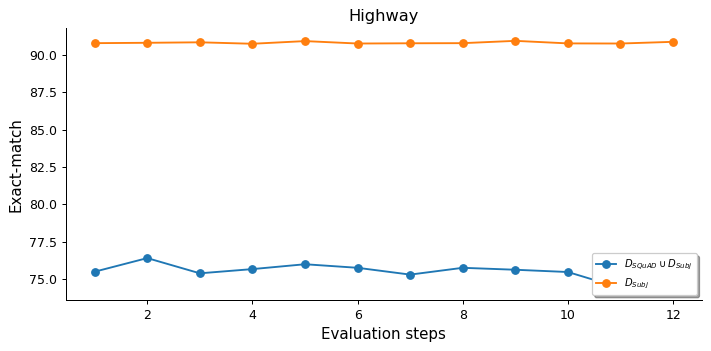

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

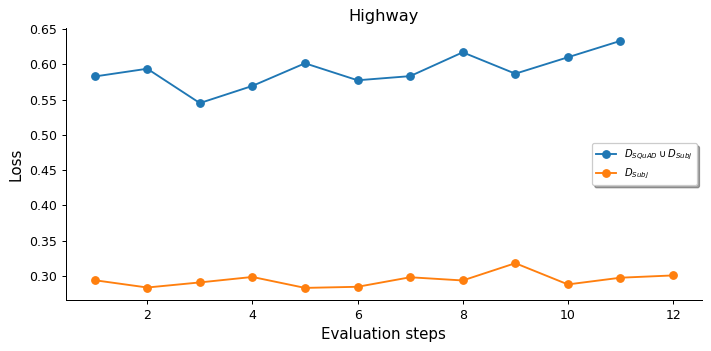

====== Model: RECURRENT ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

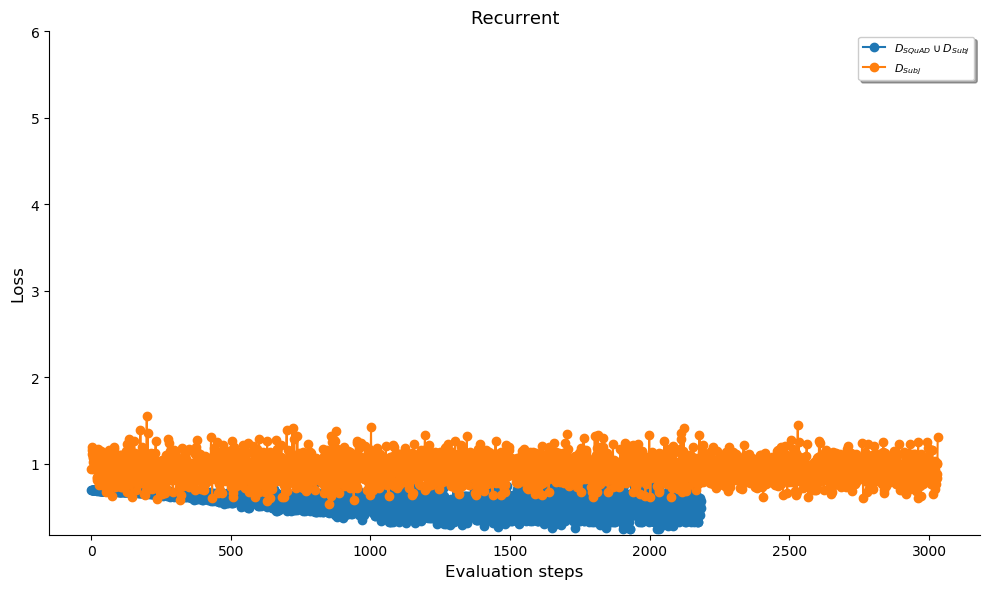

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

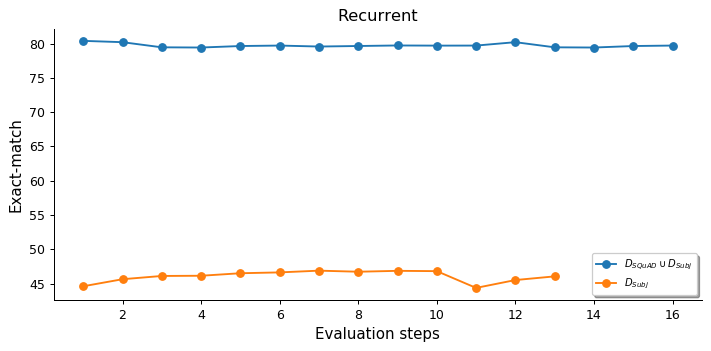

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

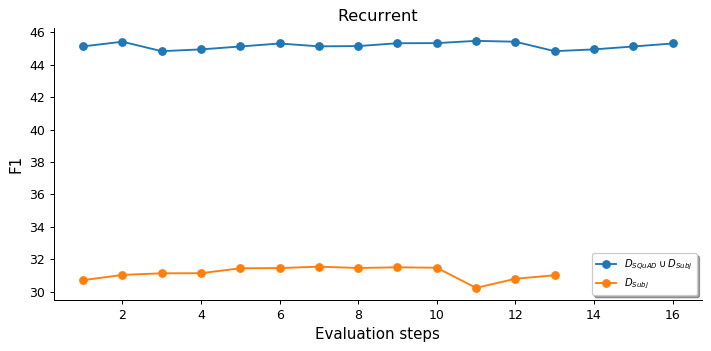

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

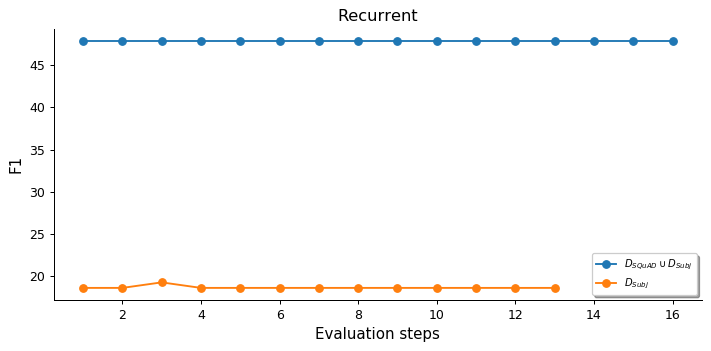

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

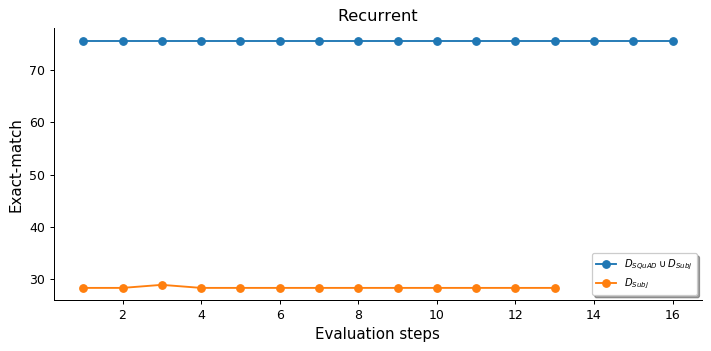

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

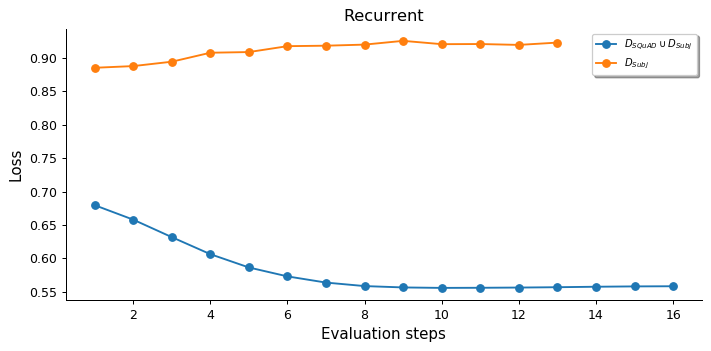

====== Model: RECURRENT_HIGHWAY ======

===== Metric: BATCH_LOSS =====



<Figure size 432x288 with 0 Axes>

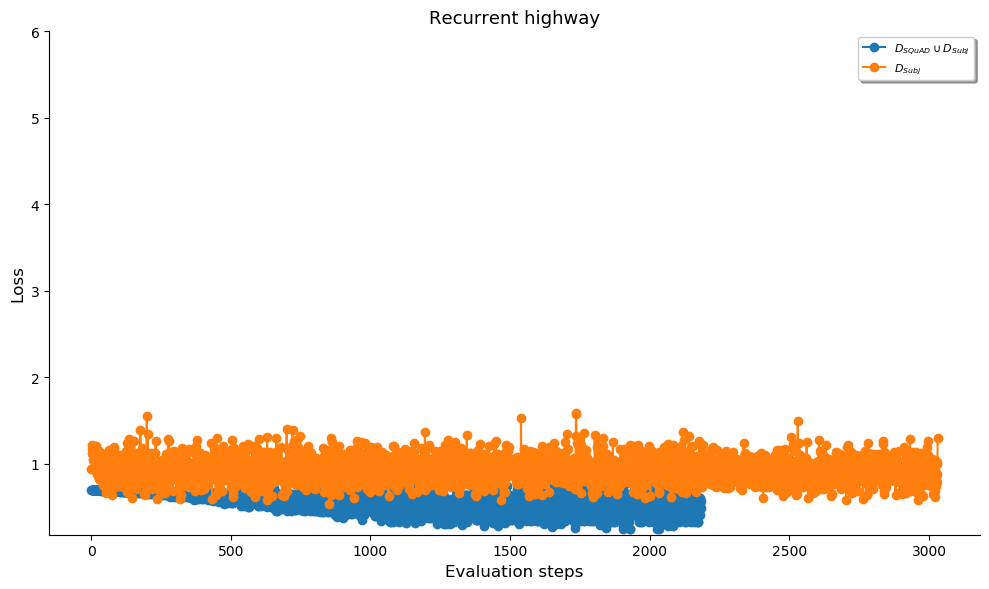

===== Metric: BATCH_ACC =====



<Figure size 432x288 with 0 Axes>

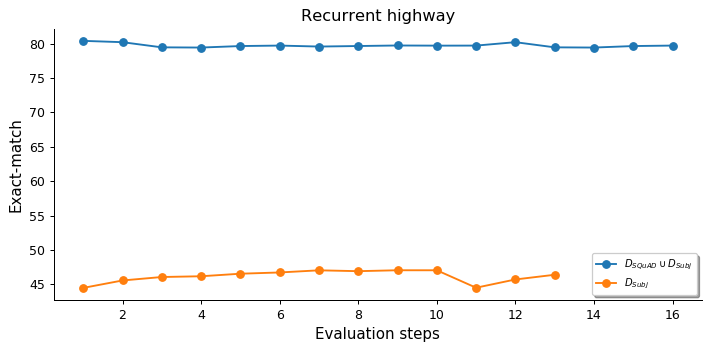

===== Metric: BATCH_F1 =====



<Figure size 432x288 with 0 Axes>

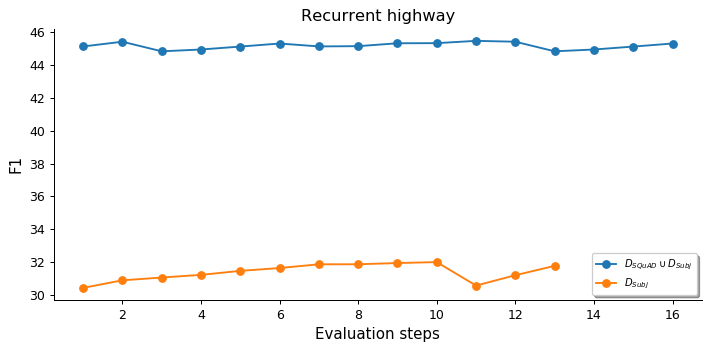

===== Metric: VAL_F1 =====



<Figure size 432x288 with 0 Axes>

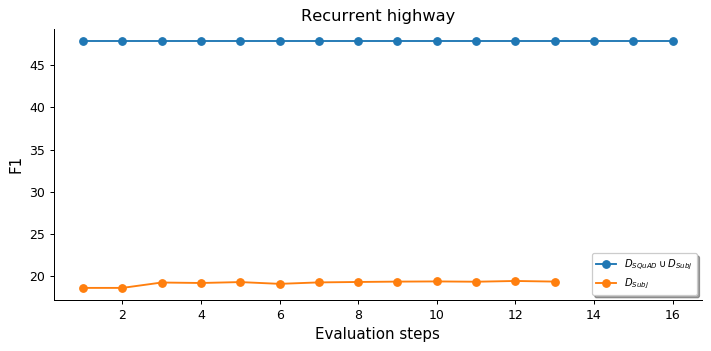

===== Metric: VAL_ACC =====



<Figure size 432x288 with 0 Axes>

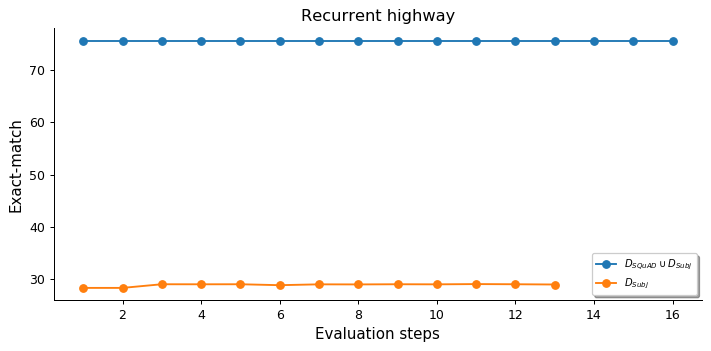

===== Metric: VAL_LOSS =====



<Figure size 432x288 with 0 Axes>

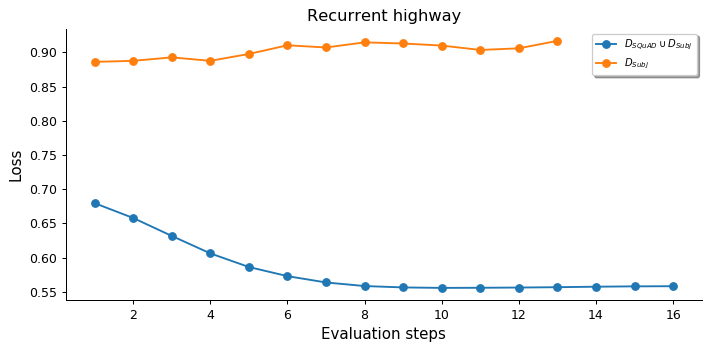

<Figure size 432x288 with 0 Axes>

In [16]:
plotting(models=models, metrics=metrics, task=task, version=version, task_setting=task_setting, iv=iv, aux=aux)

## Performance over time (evaluation steps) - comparison across $\tilde f$  \textit{ (i.e., models)}

In [ ]:
# specify specific hyperparameters
models = ['combined', 'SubjQA']
iv = 'models'

In [ ]:
plotting(models=models, metrics=metrics, task=task, version=version, task_setting=task_setting, iv=iv, aux=aux)